# Data Analysis of Olivocerebellar Model

## Table of Contents
### 1. Import All
    1. Import packages
    2. Import data of simulations
### 2. Split Data - Before/After Adaptation
### 3. Connectivity Graph
### x. Purkinje Cell 
    1. Input current
    2. Seperate Input current
### x. Inferior Olive
    1. Spike Time comparisson
### x. Correlations/Delays
    1. IO - IO 
    2. Correlation between inputs
### x. Complex Spike Analysis
    1. PC current input
    2. Voltage of IO cell
    

## 1. Import All

In [1]:
# 1.1) Import packages
import numpy as np
from importlib import reload
from brian2 import*
import pickle
import NeuroTools as nt
from NeuroTools import signals, analysis
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.io as sio
import seaborn as sns
import matplotlib.patches as mpatches
#import plotpy.express as px
%matplotlib notebook

# Import and reload my helpers module for iterative development
import helpers
reload(helpers)
from helpers.Function_DataAnalysis import *
#from helpers.bin import *

# default dict. to assign values
from collections import defaultdict

# 1.2) Import data of simulations
nameInput = '2Sine_50S'
#name_simparam = nameInput + '_SimParams.pickle'

name_VoltCell_STDP = nameInput + '_VoltageCell_Plasticity.pickle'
name_VoltCell_noSTDP = nameInput + '_VoltageCell_NoPlasticity.pickle'

name_SpikeT_noSTDP = nameInput + '_SpikeTimes_NoPlasticity.pickle'
name_SpikeT_STDP = nameInput + '_SpikeTimes_Plasticity.pickle'

#name_PV = nameInput + '_PlasticityVariables.pickle'
name_Input_noSTDP = nameInput + 'AfterSim_NoPlasticity.pickle'
name_Input_STDP = nameInput + 'AfterSim_Plasticity.pickle'

#name_PV = nameInput + '_PlasticityVariables.pickle'
#with open(name_PV, 'rb') as par:
#    PV = pickle.load(par)
with open(name_SpikeT_noSTDP, 'rb') as st:
    SpikeTimes_noSTDP = pickle.load(st)
with open(name_VoltCell_noSTDP, 'rb') as vc:
    VoltCell_noSTDP = pickle.load(vc)
with open(name_Input_noSTDP, 'rb') as inp:
    Input_noSTDP = pickle.load(inp)

with open(name_SpikeT_STDP, 'rb') as stm:
    SpikeTimes_STDP = pickle.load(stm)
with open(name_VoltCell_STDP, 'rb') as vcm:
    VoltCell_STDP = pickle.load(vcm)
with open(name_Input_STDP, 'rb') as inpm:
    Input_STDP = pickle.load(inpm)


## 2. Split Data - Before/After Adaptation

In [2]:
# 2) Split Data - before/after adaptation    

# before = start_t:t_beforeAdaptation
# after = t_beforeAdaptaion:end
# indicated by BA (BeforeAdaptation) and AA (AfterAdaptation) accordingly

start = 1000 # remove first second of data due to transient
t_beforeAdaptation = int(len(Input_STDP['I'][1])/2)
print(len(Input_STDP['I'][1]))
print(t_beforeAdaptation)

nrInputs=Input_STDP['I'].shape[0] # number of inputs

nrPC = VoltCell_noSTDP['PC'].shape[0]
nrDCN = VoltCell_noSTDP['DCN'].shape[0]
nrIO = VoltCell_noSTDP['IOsoma'].shape[0]
nrDummy = nrPC*nrInputs
lengthSim =VoltCell_noSTDP['PC'].shape[1]


#### NOTE: What to do with 'regular' Input?

# Input to the system
Input = Slicing(Input_noSTDP, t_start=start)
Input_BA = Slicing(Input_noSTDP, t_start=start)
Input_AA = Slicing(Input_STDP, t_start=t_beforeAdaptation)

# Voltages of Cells
VoltCell = Slicing(VoltCell_noSTDP, t_start=start)
VoltCell_BA = Slicing(VoltCell_noSTDP, t_start=start)
VoltCell_AA = Slicing(VoltCell_STDP, t_start=t_beforeAdaptation)

for k in range(0,nrIO):
    spikeio_aa, _ = find_peaks(VoltCell_STDP['IOsoma'][k], height=0.0, distance = 10) 
    spikeio_ba, _ = find_peaks(VoltCell_noSTDP['IOsoma'][k], height=0.0, distance = 10) 
    spikeio_ba = spikeio_ba/1000
    spikeio_aa = spikeio_aa/1000
    SpikeTimes_noSTDP['IO'][k]=spikeio_ba
    SpikeTimes_STDP['IO'][k]=spikeio_aa
    
# Slicing spike times
SpikeTimes_BA = SlicingSpikes(SpikeTimes_noSTDP, t_start=start/1e3)
SpikeTimes_AA = SlicingSpikes(SpikeTimes_STDP, t_start=t_beforeAdaptation/1e3)
#SpikeTimes = SlicingSpikes(SpikeTimes_noSTDP, t_start=start/1e3)

#print('1-2.5s',SpikeTimes_BA
#     ,'2.5-5s',SpikeTimes_AA)
print('1-2.5s input', len(Input_BA['I'][1]),
     '2.5-5s input', len(Input_AA['I'][1]))
print('1-26 s spikes io', SpikeTimes_BA['IO'][1],
     '25-50 s spikes io', SpikeTimes_AA['IO'][1])

50000
25000
1-2.5s input 25000 2.5-5s input 25000
1-26 s spikes io [ 1.096  1.318  1.538  1.757  1.976  2.196  2.416  2.635  2.853  3.07
  3.29   3.509  3.728  3.947  4.166  4.386  4.605  4.821  5.041  5.261
  5.48   5.699  5.918  6.138  6.358  6.574  6.792  7.012  7.229  7.449
  7.667  7.886  8.107  8.326  8.542  8.758  8.977  9.196  9.415  9.633
  9.853 10.073 10.292 10.508 10.726 10.946 11.166 11.384 11.603 11.823
 12.043 12.261 12.479 12.7   12.919 13.138 13.357 13.577 13.798 14.016
 14.229 14.447 14.667 14.886 15.104 15.324 15.544 15.765 15.984 16.2
 16.419 16.639 16.858 17.077 17.297 17.517 17.737 17.955 18.173 18.39
 18.606 18.824 19.044 19.262 19.482 19.7   19.918 20.138 20.356 20.575
 20.795 21.016 21.236 21.455 21.672 21.89  22.109 22.328 22.547 22.768
 22.989 23.208 23.424 23.639 23.86  24.08  24.299 24.518 24.737 24.956
 25.176 25.394 25.611 25.831] 25-50 s spikes io [25.114 25.337 25.559 25.783 26.007 26.23  26.453 26.677 26.903 27.127
 27.349 27.572 27.798 28.024 28.247 2

### 3. Connectivity Graph

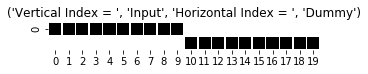

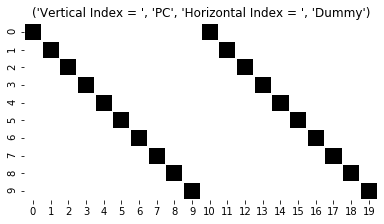

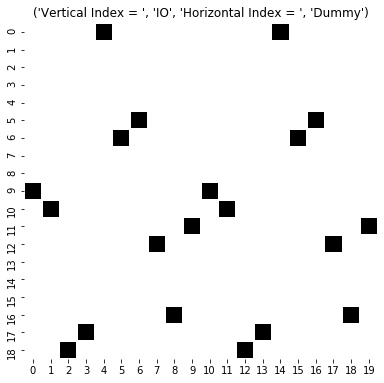

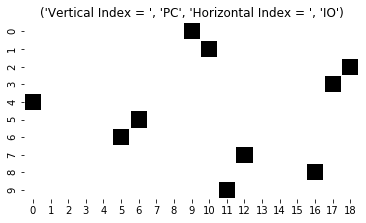

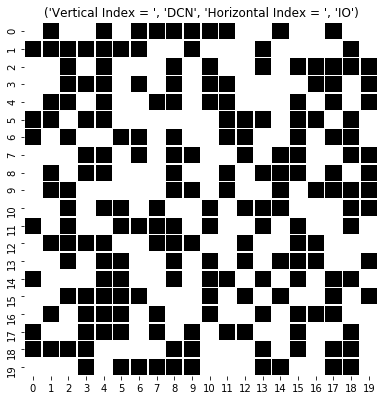

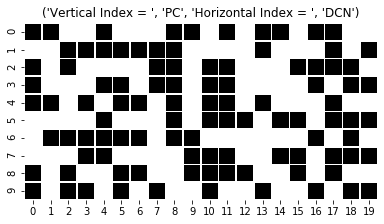

In [3]:
# Connection Graphs

if nrInputs == 5 :
    # Input - Dummy
    i_ind = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
    j_ind = np.arange(nrDummy)
    Connectivity(i_ind,j_ind,'Input','Dummy')

    # Dummy-PC
    i_dPC = np.arange(nrInputs*nrPC)
    j_dPC = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Connectivity(j_dPC,i_dPC,'PC','Dummy')
    # IO - dummy 
    i_IOd = [9, 10, 18, 17, 0, 6, 5, 12, 16, 11, 9, 10, 18, 17, 0, 6, 5, 12, 16, 11, 9, 10, 18, 17, 0, 6, 5, 12, 16, 11, 9, 10, 18, 17, 0, 6, 5, 12, 16, 11, 9, 10, 18, 17, 0, 6, 5, 12, 16, 11]
    j_IOd=np.arange(nrInputs*nrPC)
    Connectivity(i_IOd,j_IOd,'IO','Dummy')
    # IO - PC
    i_IOPC = [9,10, 18, 17, 0, 6, 5, 12, 16, 11]
    j_IOPC = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Connectivity(j_IOPC,i_IOPC,'PC','IO')
    # DCN - IO
    i_DCNIO = [0, 0 ,0, 0 ,0,0 ,0, 0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,10 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,11 ,12 ,12 ,12 ,12 ,12 ,12 ,12 ,12 ,12 ,12 ,13 ,13 ,13 ,13 ,13 ,13 ,13 ,13 ,13 ,13 ,14 ,14 ,14 ,14,14 ,14 ,14 ,14 ,14 ,14 ,15 ,15 ,15 ,15 ,15 ,15 ,15 ,15 ,15 ,15 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,16 ,17 ,17 ,17 ,17 ,17 ,17 ,17 ,17 ,17 ,17 ,18 ,18 ,18 ,18 ,18 ,18 ,18 ,18 ,18 ,18 ,19 ,19,19 ,19 ,19 ,19 ,19 ,19 ,19 ,19]
    j_DCNIO = [5 ,7, 10, 15 ,4 ,6 ,9 ,3 ,1, 11 ,8 ,4 ,11, 17, 14 ,9 ,3 ,2 ,0, 15 ,0 ,3 ,7 ,2 ,9 ,10, 19, 17 ,4 ,14 ,2 ,8, 16 ,3 ,5, 19, 12 ,0, 18, 17, 12 ,9 ,6, 10, 13 ,3 ,4 ,2, 15, 18 ,2, 14, 19, 18, 16, 17 ,5 ,8 ,4 ,9, 14 ,6 ,8, 16, 12, 19 ,4 ,5 ,0 ,3, 16 ,9,13 ,1, 17 ,0 ,8, 14 ,7, 10, 10 ,6, 13 ,1 ,4, 18 ,8, 12, 17 ,0 ,7, 11 ,3 ,1 ,9, 10,6, 17, 13, 18 ,8, 16 ,7 ,1 ,6, 12, 10, 19, 15 ,4, 12 ,2 ,4 ,1, 19, 13, 17, 16 ,8 ,9, 12 ,4 ,3 ,1 ,0 ,8 ,2, 11, 14, 13, 10, 17, 12, 13, 16, 11 ,4 ,2 ,8 ,5, 15, 17, 13, 19, 14 ,1 ,4, 16 ,6 ,3 ,5, 16 ,0, 19 ,2 ,9, 18 ,6 ,4 ,1, 10 ,8, 15 ,3 ,0 ,1 ,4, 13, 19 ,7 ,3 ,9, 14, 18, 16, 17 ,5, 19, 11, 10, 11 ,6, 15, 10 ,5, 12, 17 ,4 ,8, 16, 14 ,8,
     10, 15, 4, 11 ,2 ,7 ,5, 18]
    Connectivity(i_DCNIO,j_DCNIO,'DCN','IO')

    # PC - DCN
    i_PCDCN = [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,3 ,3 ,3 ,3 ,3 ,3 ,3
     ,3 ,3 ,3 ,4 ,4 ,4 ,4 ,4 ,4 ,4 ,4 ,4 ,4 ,5 ,5 ,5 ,5 ,5 ,5 ,5 ,5 ,5 ,5 ,6 ,6 ,6 ,6 ,6 ,6 ,6 ,6 ,6 ,6 ,7 ,7 ,7 ,7
     ,7 ,7 ,7 ,7 ,7 ,7 ,8 ,8 ,8 ,8 ,8 ,8 ,8 ,8 ,8 ,8 ,9 ,9 ,9 ,9 ,9 ,9 ,9 ,9 ,9 ,9]
    j_PCDCN = [15, 10, 18 ,3 ,8 ,7 ,1 ,4, 16 ,2 ,4, 14, 12, 10 ,2, 13 ,3 ,0, 15, 16 ,5 ,9 ,0, 13,14, 11, 15, 17, 16, 10, 16 ,1, 13, 17 ,9 ,3 ,5, 10, 12, 18 ,4, 12, 18 ,2 ,5, 13, 15 ,7 ,1 ,6 ,8, 16, 17 ,1, 13, 12, 15 ,7 ,4 ,2, 17 ,0, 14 ,7 ,3, 19 ,4 ,9 ,5 ,2, 18 ,4 ,0, 11, 15 ,3 ,9 ,1 ,8 ,2 ,19 ,1 ,11, 10 ,6 ,0 ,9, 17, 12 ,3 ,7, 11, 17 ,1 ,2, 14,5 ,4, 12 ,0]
    Connectivity(i_PCDCN,j_PCDCN,'PC','DCN')
elif nrInputs == 2:
    # Input-dummy
    i_ind = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    j_ind = np.arange(nrInputs*nrPC)
    Connectivity(i_ind,j_ind,'Input','Dummy')
    # dummy-PC
    i_dPC = np.arange(nrInputs*nrPC)
    j_dPC = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Connectivity(j_dPC,i_dPC,'PC','Dummy')

    # IO - dummy
    i_IOd = [9,10, 18, 17, 0, 6, 5, 12, 16, 11, 9,10, 18, 17, 0, 6, 5, 12, 16, 11]
    j_IOd=np.arange(nrInputs*nrPC)
    Connectivity(i_IOd,j_IOd,'IO','Dummy')

    # IO - PC
    i_IOPC = [9,10, 18, 17, 0, 6, 5, 12, 16, 11]
    j_IOPC = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Connectivity(j_IOPC,i_IOPC,'PC','IO')

    # DCN - IO
    i_DCNIO = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19]

    j_DCNIO = [11,4,8,9,14,10,1,7,17,6,9,18,1,0,5,3,6,4,13,2,17,15,4,2,10,16,18,13,19,8,10,4,8,6,3,17,2,19,16,11,19,11,15,2,7,8,4,17,10,1,16,12,15,13,3,0,4,11,1,18,11,8,18,17,12,15,2,5,0,6,15,9,6,8,14,4,18,3,19,12,19,4,14,3,1,11,13,8,15,17,14,16,8,9,11,1,17,2,18,19,12,18,19,10,7,2,13,14,4,5,2,8,5,7,0,13,15,18,6,10,16,3,8,15,1,12,4,7,9,2,10,2,8,5,12,19,16,14,15,4,10,17,13,5,0,18,8,15,4,11,5,12,6,4,2,17,19,14,10,3,17,10,1,15,3,4,7,13,5,16,9,3,15,11,12,0,4,5,7,18,18,2,0,3,9,15,13,1,17,8,14,18,17,3,7,8,9,6,5,13]
    Connectivity(i_DCNIO,j_DCNIO,'DCN','IO')

    # PC - DCN
    i_PCDCN = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9]
    j_PCDCN = [8,17,13,9,11,14,4,16,1,0,17,5,13,2,3,19,4,7,6,8,15,18,2,8,7,11,0,10,16,17,4,16,19,11,18,7,10,8,5,0,0,17,11,13,3,6,1,8,5,10,19,17,12,15,14,4,8,10,18,11,8,6,1,4,16,5,18,3,2,9,3,9,18,11,14,15,4,17,19,10,6,15,10,5,0,11,9,17,12,2,18,0,3,7,2,16,19,10,5,13]
    Connectivity(i_PCDCN,j_PCDCN,'PC','DCN')


### 3. Purkinje Cell

In [4]:
# 3.1 Input current 

InputCurrentPC={}
InputCurrentPC_BA={}
InputCurrentPC_AA={}
print(size(Input_AA['nweight'],0))
for i in range(0,nrPC):
    # Create names for the inputs
    name = 'PC'+str(i)
    nameBA = 'PC'+str(i) + 'BA'
    nameAA = 'PC'+str(i) + 'AA'
    
    tot = name + 'total'
    totBA = nameBA + 'total'
    totAA = nameAA + 'total'
    # Connectivity between PC-dummy
    steps =np.arange(i,nrDummy,nrPC)
    print(steps)
    # Multiply the current times the weight
    #current = [Input['I'][k]*Input['nweight'][steps[k]] for k in range(0,len(steps))]
    #currentBA = [Input_BA['I'][k]*Input_BA['nweight'][steps[k]] for k in range(0,len(steps))]
    
    currentBA = [Input_BA['I'][k]*Input_BA['nweight'][steps[k]] for k in range(0,len(steps))]
    currentAA = [Input_AA['I'][k]*Input_AA['nweight'][steps[k]] for k in range(0,len(steps))]
    #[Input_s.nweight_BA[steps[k]]*Input_s.I_BA[k] for k in range(0,len(steps))]
    #print(steps[1])
    #print(size(Input_s.nweight_BA[0]))
    #print(size(current))
    # Sum over the column to get the total amount of current
    #summedcurrent = sum(current,axis=0)
    summedcurrentBA = sum(currentBA, axis=0)
    summedcurrentAA = sum(currentAA, axis=0)
    
    #InputCurrentPC[name] = current
    InputCurrentPC_BA[nameBA] = currentBA
    InputCurrentPC_AA[nameAA] = currentAA
    
    #InputCurrentPC[tot] = summedcurrent
    InputCurrentPC_BA[totBA] = summedcurrentBA
    InputCurrentPC_AA[totAA] = summedcurrentAA
    
    
#for k in range(0,nrPC):
#    figure() 
#    title('PC'+str(k)+'input current')
#    nameBA= 'PC'+str(k)+'BA'
#    nameAA= 'PC'+str(k)+'AA'
#    for i in range(0,nrInputs):
#        subplot(nrInputs,1,i+1)
#        plot(InputCurrentPC_BA[nameBA][i])
#        plot(InputCurrentPC_AA[nameAA][i])
#        #subplot(nrInputs,1,i+1)
#    figure()
#    for i in range(0,nrInputs):
#        subplot(nrInputs,1,i+1)
#        plot(Input_BA['nweight'][k+i])
#        axvline(SpikeTimes_BA[connectionVector[k]])
#        plot(Input_AA['nweight'][k+i])

#print(size(InputCurrentPC_BA['PC1BA'],0))

20
[ 0 10]
[ 1 11]
[ 2 12]
[ 3 13]
[ 4 14]
[ 5 15]
[ 6 16]
[ 7 17]
[ 8 18]
[ 9 19]


### 4. IO Cell

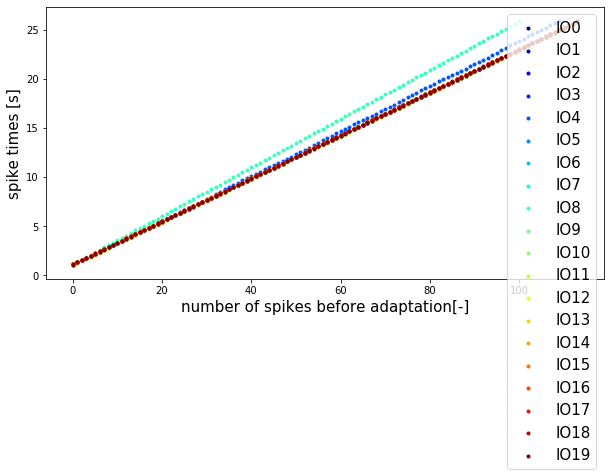

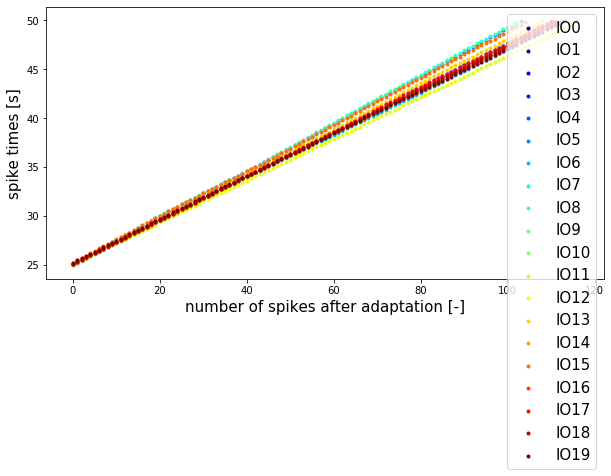

In [5]:
# 4.1 Spike time comparisson
import matplotlib.colors as colors
import matplotlib.cm as cmx

NCURVES=nrIO
values = range(NCURVES)
jet = get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
ionam=[]
figure(figsize=(10,5))
for kk in range(0,nrIO):
    ioname = 'IO' + str(kk)
    spikio_BA = SpikeTimes_BA['IO'][kk]
    
    nr =  len(spikio_BA)   
    colorVal = scalarMap.to_rgba(values[kk])
    
    mm = scatter(x=where(spikio_BA==spikio_BA), y=spikio_BA, marker='.', color=colorVal)
    #for uu in range(0,nr):
    #    scatter(x=where(spikio_BA==spikio_BA[uu]),y=spikio_BA[uu],marker=".", color=colorVal)
    ionam.append(ioname)
xlabel('number of spikes before adaptation[-]',fontsize=15)
ylabel('spike times [s]',fontsize=15)
legend(ionam, fontsize=15)
show()

figure(figsize=(10,5))
for yy in range(0,nrIO):
    ioname = 'IO' + str(yy)
    spikio_BA = SpikeTimes_AA['IO'][yy]
    
    nr =  len(spikio_BA)   
    colorVal = scalarMap.to_rgba(values[yy])
    
    mm = scatter(x=where(spikio_BA==spikio_BA), y=spikio_BA, marker='.', color=colorVal)
    #for uu in range(0,nr):
    #    scatter(x=where(spikio_BA==spikio_BA[uu]),y=spikio_BA[uu],marker=".", color=colorVal)
    ionam.append(ioname)
xlabel('number of spikes after adaptation [-]',fontsize=15)
ylabel('spike times [s]', fontsize=15)
legend(ionam, fontsize=15)
show()

        

### 5. Correlations

corr ba [array([[1.        , 0.74329397],
       [0.74329397, 1.        ]]), array([[1.        , 0.66896158],
       [0.66896158, 1.        ]])]
corr aa [array([[1.        , 0.74321473],
       [0.74321473, 1.        ]]), array([[1.        , 0.66941526],
       [0.66941526, 1.        ]])]
corr ba [array([[1.        , 0.66896455],
       [0.66896455, 1.        ]]), array([[1.        , 0.74329061],
       [0.74329061, 1.        ]])]
corr aa [array([[1.        , 0.66886131],
       [0.66886131, 1.        ]]), array([[1.        , 0.74359464],
       [0.74359464, 1.        ]])]
corr ba [array([[1.        , 0.66436365],
       [0.66436365, 1.        ]]), array([[1.        , 0.74740576],
       [0.74740576, 1.        ]])]
corr aa [array([[1.        , 0.66433268],
       [0.66433268, 1.        ]]), array([[1.        , 0.74771318],
       [0.74771318, 1.        ]])]
corr ba [array([[1.        , 0.65850442],
       [0.65850442, 1.        ]]), array([[1.        , 0.75257311],
       [0.75257311, 

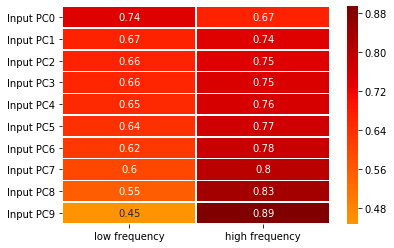

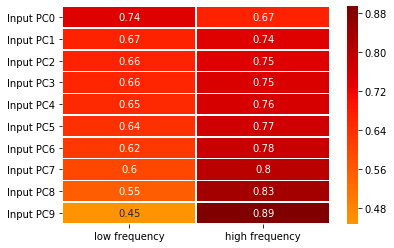

In [6]:
# 5.2 Correlation between inputs

corr_BA_Inputs = np.empty((nrPC,nrInputs))
corr_AA_Inputs = np.empty((nrPC,nrInputs))

for k in range(0,nrPC):
    namePC_BA = 'PC'+str(k)+'BA'
    namePC_AA = 'PC'+str(k)+'AA'
    #x=Input_BA['I_InputPC'][k]
    #y=InputCurrentPC_BA[namePC_BA][0]
    #print(x,len(x))
    #print(y,len(y))
    #print(nrInputs)
    #corrcoef(Input_BA['I_InputPC'])
    corr_InputPC_BA = [np.corrcoef(Input_BA['I_InputPC'][k],InputCurrentPC_BA[namePC_BA][p]) for p in range(0,nrInputs)]
    corr_InputPC_AA = [np.corrcoef(Input_AA['I_InputPC'][k],InputCurrentPC_AA[namePC_AA][p]) for p in range(0,nrInputs)]
    print('corr ba',corr_InputPC_BA)
    print('corr aa',corr_InputPC_AA)

    for p in range(0,len(corr_InputPC_BA)):
        corr_BA_Inputs[k,p]=corr_InputPC_BA[p][0,1]
        corr_AA_Inputs[k,p] = corr_InputPC_AA[p][0,1]

    #print('correlation coefficient AA',corr_InputPC_AA)
    #print('correlation coefficient BA',corr_InputPC_BA)
#print(corr_BA_Inputs)
#print(corr_AA_Inputs)
#print(corr_BA_Inputs-corr_AA_Inputs)
#figure()
#plot(InputCurrentPC_BA['PC0BA'][0])
figure()
ylabel=['Input PC'+str(k) for k in range(0,nrPC)]
nf = sns.heatmap(corr_BA_Inputs,center=0, cmap='jet', linewidths=.5, 
                 xticklabels=['low frequency','high frequency'],yticklabels=ylabel,
                 annot=True)
figure()
ylabel=['Input PC'+str(k) for k in range(0,nrPC)]
nf = sns.heatmap(corr_AA_Inputs,center=0, cmap='jet', linewidths=.5, 
                 xticklabels=['low frequency','high frequency'],yticklabels=ylabel,
                 annot=True)
#nf.set_xtickslabels()

### 6. Complex Spike Analysis

In [7]:
# 6.1 Input Current Purkinje Cell
# Get the current that the Purkinje cell sees 150 ms before and 50 ms after
# a complex spike of the connected Inferior Olive

# The IO cells that are connected to the Purkinje cells. 
# Position 1 of the vector corresponds to PC1, 2 to PC2 etc.
connectionVectorIO = [9,10, 18, 17, 0, 6, 5, 12, 16, 11]

time_before_spike = 200e-3
time_after_spike = 200e-3
CS_currentPC=defaultdict(dict)
duration = int((time_before_spike+time_after_spike)*1e3)

#print(dur)
meancur_BA=np.zeros((nrPC,duration))
meancur_AA=np.zeros((nrPC,duration))

sep_curBA=np.zeros((nrPC*2,duration))
sep_curAA=np.zeros((nrPC*2,duration))

mean_voltIO_AA = np.zeros((nrPC,duration))
mean_voltIO_BA = np.zeros((nrPC,duration))

InpPCBA = Input_BA['I_InputPC']
InpPCAA = Input_AA['I_InputPC']
#print(InpPCBA)
#print(InpPCAA)

#print(InpPC)
for jj in range(0,nrPC):
    strp = str(connectionVectorIO[jj])
    pcnr = 'PC'+str(jj)+'BA'
    pcnr2 = 'PC'+str(jj)+'AA'
    #SpikesIO = SpikeTimes_s.ionr
    
    # Input current I_Noise to PC
    InputCurrBA = InpPCBA[jj]
    InputCurrAA = InpPCAA[jj]
    
    # Seperate Inputs (after weight multiplication)
    sep_inpba=InputCurrentPC_BA[pcnr]
    sep_inpaa=InputCurrentPC_AA[pcnr2]
    
    # Membrane potential of IO cells
    voltIO_BA = VoltCell_BA['IOsoma'][connectionVectorIO[jj]]
    voltIO_AA = VoltCell_AA['IOsoma'][connectionVectorIO[jj]]
    
    #print(InputCurrBA, sep_inpba)
    #print(sep_inpba[1])
    #InputCurrentPC[pcnr]
    #VoltPC = VoltCell_['PC'][jj]
    #print(VoltPC)
    
    CS_BA= SpikeTimes_BA['IO'][connectionVectorIO[jj]]
    CS_AA = SpikeTimes_AA['IO'][connectionVectorIO[jj]]
    
    # initialization of empty array which are assigned in the loop below
    empt_BA =np.zeros((len(CS_BA),duration))
    empt_AA =np.zeros((len(CS_AA),duration))
    empt_curBA =np.zeros((len(CS_BA)*nrInputs,duration))
    empt_curAA =np.zeros((len(CS_AA)*nrInputs,duration))
    empt_membIO_BA = np.zeros((len(CS_BA),duration))
    empt_membIO_AA = np.zeros((len(CS_AA),duration))
    

    k=0
    for ii in range(0,len(CS_BA)):
        begin_analysis = max(int(((CS_BA[ii]-time_before_spike)/1e-3)),CS_BA[0]*1000)-start
        end_analysis = (int((min((CS_BA[ii]+time_after_spike)/1e-3,
                        CS_BA[-1]*1000))))-start
        #print('before adding', end_analysis-begin_analysis)
        if end_analysis-begin_analysis==duration-1 : 
            end_analysis=end_analysis+1
        elif end_analysis-begin_analysis==duration+1 : 
            end_analysis=end_analysis-1
        #print('after adding', end_analysis-begin_analysis)
        
        
        if (end_analysis-abs(begin_analysis))==duration :
            #CS_currentPC[ionr][ii] = InputCurr[begin_analysis:end_analysis]
            empt_BA[ii]= InputCurrBA[begin_analysis:end_analysis]
            
            # Individual inputs to the PC
            for t in range(0,nrInputs):
                empt_curBA[ii*2+t]=sep_inpba[t][begin_analysis:end_analysis]
                
            
            # IO membrane potential 
            empt_membIO_BA[ii] = voltIO_BA[begin_analysis:end_analysis]
            
            
            #empt_curBA[1+ii*2]=sep_inpba[1][begin_analysis:end_analysis]
            #print(empt_curBA[ii*2])
            #print('got here',empt_curBA)
            #empt_VBA[ii]=VoltPC[begin_analysis:end_analysis]
        else:
            lopl=2+1
            #print(end_analysis-begin_analysis)
            #print('too short')
        #print(empt_curBA[ii*2+t])
        #print('empt cur ba',empt_curBA)
    #print(len(CS_AA))
    for kk in range(0,len(CS_AA)):
        begin_analysis = max(int(((CS_AA[kk]-time_before_spike)/1e-3)),CS_AA[0]*1e3)-t_beforeAdaptation
        #print('begin analysis', begin_analysis)
        end_analysis = int((min((CS_AA[kk]+time_after_spike)/1e-3,
                        CS_AA[-1]*1000)))-t_beforeAdaptation
        #print('end analysis', end_analysis)
        #print(end_analysis-begin_analysis)
        if end_analysis-begin_analysis==duration-1 : 
            end_analysis=end_analysis+1
        elif end_analysis-begin_analysis==duration+1 : 
            end_analysis=end_analysis-1
            
        if (end_analysis-abs(begin_analysis))==duration :
            #print('got there')
            #CS_currentPC[ionr][kk] = InputCurr[begin_analysis:end_analysis]
            #print('aa begin', begin_analysis, 'end aa', end_analysis)
            empt_AA[kk]= InputCurrAA[begin_analysis:end_analysis] 
            
            # get the individual inputs to the PC
            for tt in range(0,nrInputs):
                empt_curAA[kk*2+tt]=sep_inpaa[tt][begin_analysis:end_analysis]
            
            # IO membrane potential
            empt_membIO_AA[kk] = voltIO_AA[begin_analysis:end_analysis]
        
            
        else:
            p=9
            #print(end_analysis-begin_analysis)
            #print('too short')

    #print(empt_curBA)                
                #print('not full time - too close to beginning')
    #print('shape_BA',empt_BA.shape)
    #print('shape AA',empt_AA.shape)
    
    # remove zeros - still present when the scope around CS is too large (e.g. CS at 0.2s and try to look at +/-0.3)
    empt_BA = empt_BA[~all(empt_BA==0, axis=1)]
    empt_AA = empt_AA[~all(empt_AA==0, axis=1)]
    
    empt_curAA=empt_curAA[~all(empt_curAA==0, axis=1)]
    empt_curBA=empt_curBA[~all(empt_curBA==0, axis=1)]
    
    empt_membIO_AA=empt_membIO_AA[~all(empt_membIO_AA==0,axis=1)]
    empt_membIO_BA=empt_membIO_BA[~all(empt_membIO_BA==0,axis=1)]
    #print(empt_membIO_AA)
    #print('empt cur after remove 0',empt_curBA.shape[0], 'nr cs ba', len(CS_BA),'times got there', k)
    #print(empt_curBA.shape[0])
    #empt_VBA = empt_VBA[~all(empt_VBA==0, axis=1)]
    #empt_VAA = empt_VAA[~all(empt_VAA==0, axis=1)]
    #print('AA =',empt_AA)
    #print('BA = ',empt_BA)
    #empt=argwhere(empt)
    #print(empt)
    meancur_BA[jj] = mean(empt_BA,axis=0)
    meancur_AA[jj] = mean(empt_AA,axis=0)
    p = [arange(0,empt_curBA.shape[0],2),arange(1,empt_curBA.shape[0],2)]
    pp = [arange(0,empt_curAA.shape[0],2),arange(1,empt_curAA.shape[0],2)]
    #pp = arange(1,empt_curBA.shape[0],2)
    #print('p',p,'pp=',pp)
    for uu in range(0,nrInputs):
        sep_curBA[jj*2+uu] = mean(empt_curBA[p[uu]], axis=0)
        sep_curAA[jj*2+uu] = mean(empt_curAA[pp[uu]], axis=0)
    
    mean_voltIO_AA[jj] = mean(empt_membIO_AA,axis=0)
    mean_voltIO_BA[jj] = mean(empt_membIO_BA,axis=0)
print(mean_voltIO_BA.shape[0])
print(mean_voltIO_AA.shape[0])

    #sep_curAA[jj*2,jj*2+1] = mean(empt_curAA,axis=0)
#print(sep_curBA.shape[0])
#print(sep_curAA.shape[0])
    #meancur_VBA[jj] =mean(empt_VBA,axis=0)
    #meancur_VAA[jj] =mean(empt_VAA,axis=0)
#print(k)
    #print('mean input current =',mean(empt,axis=0))

10
10


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 [py.warnings]


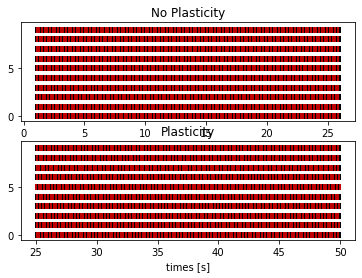

In [8]:
# 6.2 Spike Times PC before/after CS

#SpikesPC_BA=np.zeros((nrPC,dur))
#SpikesPC_AA=np.zeros((nrPC,dur))
figure()
for ii in range(0,nrPC):
    CS_BA= SpikeTimes_BA['IO'][connectionVectorIO[ii]]
    CS_AA = SpikeTimes_AA['IO'][connectionVectorIO[ii]]
    #PC_Spikes = SpikeTimes_BA['PC'][ii]
    
  
    spikesBA = SpikeTimes_BA['PC'][ii]
    spikesIOBA = SpikeTimes_BA['IO'][connectionVectorIO[ii]]
    
    spikesAA = SpikeTimes_AA['PC'][ii]
    spikesIOAA = SpikeTimes_AA['IO'][connectionVectorIO[ii]]      

    lensim = len(spikesBA)
    lensimBA = np.ones((len(spikesIOBA),1))*ii
    yPC=np.ones((lensim,1))*ii    

    lensimm = len(spikesAA)
    lensimAA=np.ones((len(spikesIOAA),1))*ii
    yPC2=np.ones((lensimm,1))*ii    

    subplot(211)
    title('No Plasticity')
    #ylabel('PC index [-]')
    axs=scatter(x=spikesBA,y=yPC,marker='|', color='black', label='PC'+str(ii))
    axs=scatter(x=spikesIOBA,y=lensimBA,marker='|',color='r')
    subplot(212)
    title('Plasticity')
    xlabel('times [s]')
    #ylabel('PC index [-]')
    axs=scatter(x=spikesAA,y=yPC2,marker='|', color='black', label='PC'+str(ii))
    axs=scatter(x=spikesIOAA,y=lensimAA,marker='|',color='r')
show()

### x.2 Membrane potential IO at CS

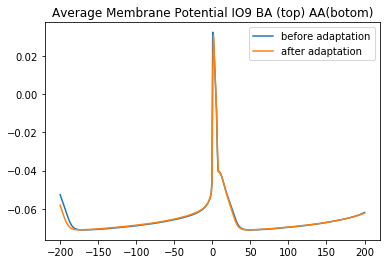

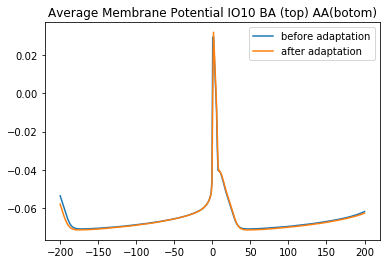

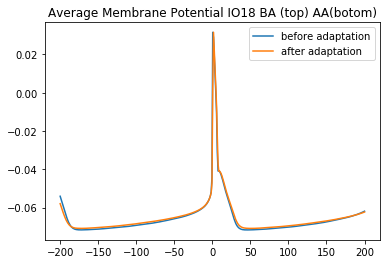

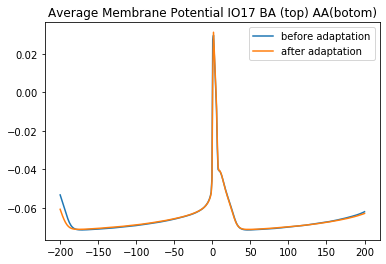

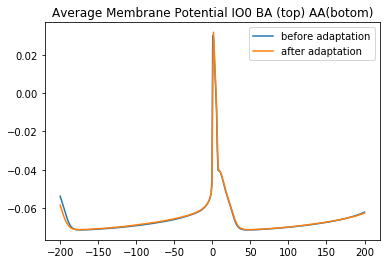

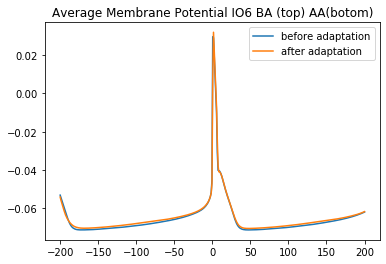

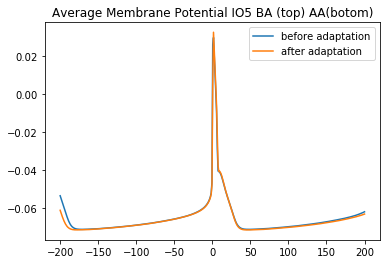

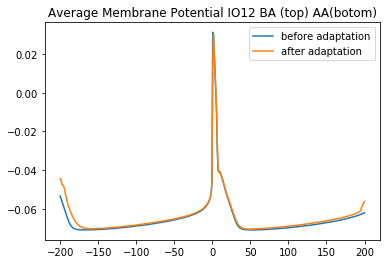

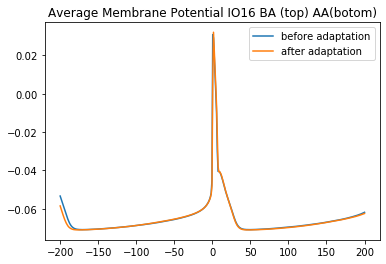

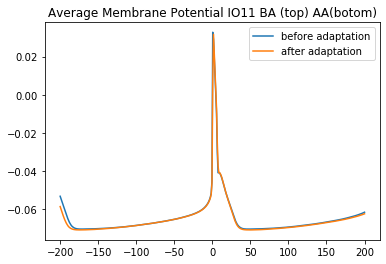

In [9]:
# x.2 Plot the average membrane potential of the IO cells around the CS
time = linspace(start=-time_before_spike*1e3,stop=time_after_spike*1e3,num=duration)

big_picture='yes'
for i in range(0,nrPC):
    
    if big_picture=='yes':
        figure()
        #for k in range(0,2):
        #subplot(2,1,1)
        title('Average Membrane Potential IO'+str(connectionVectorIO[i])+' BA (top) AA(botom)')
        plot(time,mean_voltIO_BA[i])
        #subplot(2,1,2)
        #title('Average Membrane Potential IO'+str(connectionVectorIO[i])+' AA')
        plot(time,mean_voltIO_AA[i])
        legend(['before adaptation', 'after adaptation'])

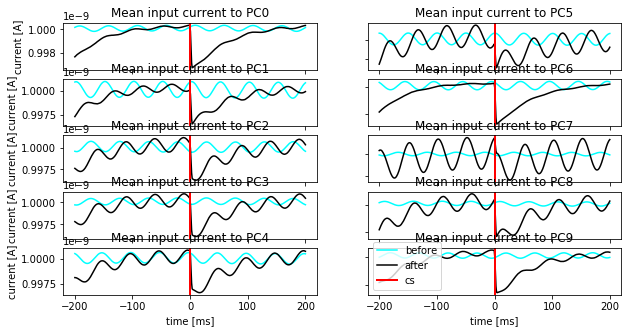

In [10]:
fig, axs = subplots(5, 2,figsize=(10,5))
p=q=0
#figure(figsize=(20,20))
#fig(figsize=(20,10))
for i in range(0,len(meancur_BA)):
    #subplot(5,2,i+1)
    axs[p,q].plot(time,meancur_BA[i], color='cyan')
    axs[p,q].plot(time,meancur_AA[i], color='black')

    #print(meancur_AA[i])
    #plot(time,meancur_BA[i], color='cyan')
    #plot(time,meancur_AA[i],color='black')
    axs[p,q].axvline(0, linewidth=2,color='r')
    axs[p,q].set_title('Mean input current to PC' + str(i))
    p=p+1
    if i==4:
        q=q+1
        p=0
    for ax in axs.flat:
        ax.set(xlabel='time [ms]', ylabel='current [A]')
    for ax in axs.flat:
        ax.label_outer()
    #axs.figsize((20,10))
legend(['before','after','cs'], loc='lower left')
show()

#fig2, axs2 = subplots(5, 2,figsize=(20,10))
#p=q=0
#for i in range(0,len(meancur_VBA)):
    #subplot(5,2,i+1)
 #   axs2[p,q].plot(time,meancur_VBA[i], color='cyan')
  #  axs2[p,q].plot(time,meancur_VAA[i], color='black')
   # axs2[p,q].axvline(0, linewidth=2,color='r')
    #print(meancur_AA[i])
    #plot(time,meancur_BA[i], color='cyan')
    #plot(time,meancur_AA[i],color='black')
    #axs2[p,q].axvline(0, linewidth=2,color='r')
    #axs2[p,q].set_title('Mean voltage of PC' + str(i))
    #p=p+1
    #if i==4:
    #    q=q+1
    #    p=0
    #for ax in axs2.flat:
    #    ax.set(xlabel='time [ms]', ylabel='Voltage [V]')
    #for ax in axs2.flat:
    #    ax.label_outer()
    #axs.figsize((20,10))
#legend(['before','after','cs'], loc='lower left')
#show()

### x. Frequency plots

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
 [py.warnings]


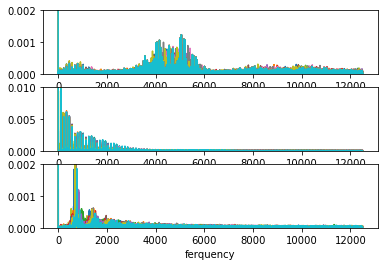

In [11]:
for l in range(0,nrIO):
    if l<10:
        sPC=VoltCell['PC'][l]
        
    sIO=VoltCell['IOsoma'][l]
    sDCN=VoltCell['DCN'][l]
    specPC=FreqSpectrum(sPC)
    specIO=FreqSpectrum(sIO)
    specDCN=FreqSpectrum(sDCN)
    #spec = np.absolute(np.fft.fft(k))
    #leng = int(len(k)/2)
    #spec = spec[:leng]
    #spec /= len(k)  # normalize
    #spec *= 2.0  # to get amplitudes of sine components, need to multiply by 2
    #spec[0] /= 2.0  # except for the dc component
    subplot(311)
    plot(specPC)
    xlabel('frequency')
    #ylabel('amplitude')
    ylim([0,0.002])

    subplot(312)
    plot(specIO)
    xlabel('ferquency')
    #ylabel('amplitude')  
    ylim([0,0.01])

    subplot(313)
    plot(specDCN)
    xlabel('ferquency')
    #ylabel('amplitude')    
    ylim([0,0.002])
show()
    

## .x Spike Raster Plot

<IPython.core.display.Javascript object>


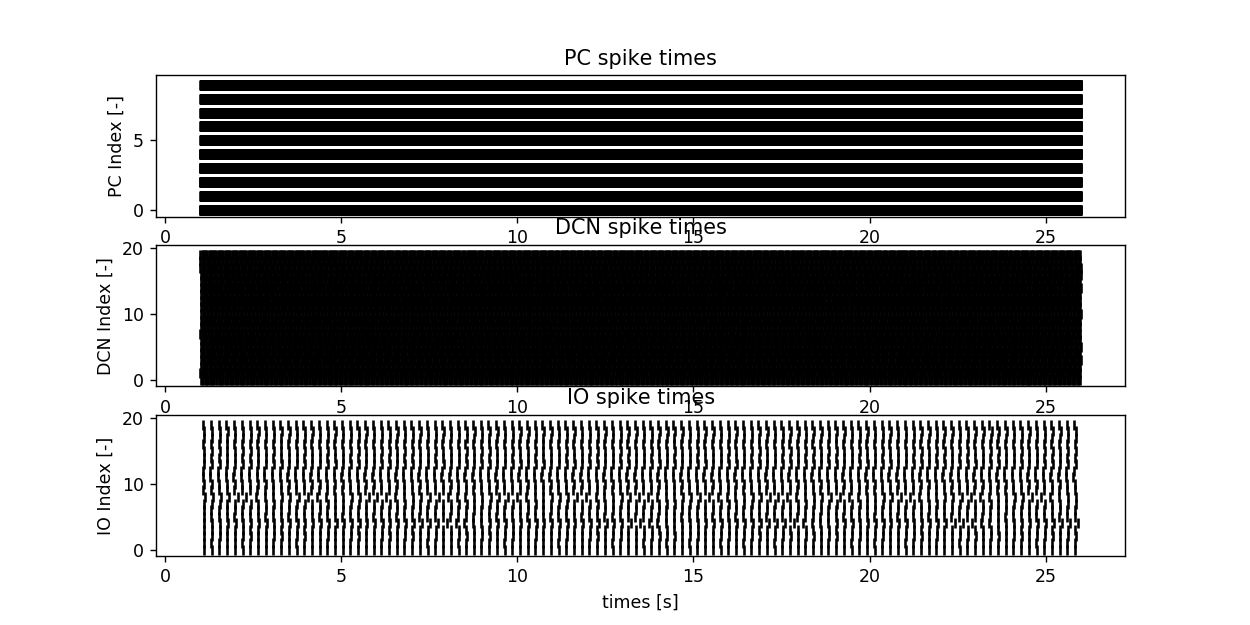

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
 [py.warnings]


<IPython.core.display.Javascript object>


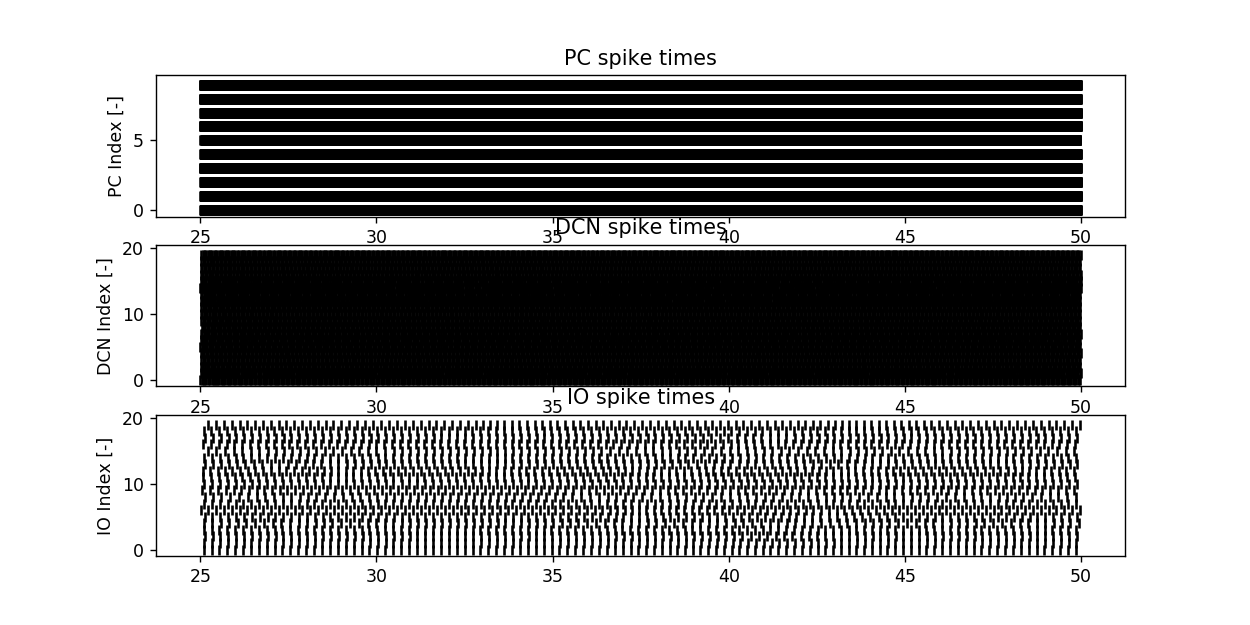

In [17]:
#for yy in range(0,nrPC):
 #   p = linspace(0,nrPC-1,nrPC)
  #  eventplot(SpikeTimes['PC'][yy], color='black', linelengths=p[yy])
   #           #linelengths=np.ones(1,nrPC
from neuronpy.graphics import spikeplot
%matplotlib notebook
#SpikeTimes.raster_plot()
#sp = spikeplot.SpikePlot()
#sp.plot_spikes(SpikeTimes['PC'][9])
fig, axs = subplots(3, 1,figsize=(10,5))
for yy in range(0,nrIO):
    if yy < 10:
        #subplot(311)
        ax1 = subplot(3,1,1)
        title("PC spike times")
        ax1.set_ylabel('PC Index [-]')
        neu = SpikeTimes_BA['PC'][yy]
        lensim = len(neu)
        yPC=np.ones((lensim,1))*yy
        axs=scatter(x=neu,y=yPC,marker='|', color='black', label='PC'+str(yy))
    axx=subplot(312, sharex=ax1)
    title('DCN spike times')
    axx.set_ylabel('DCN Index [-]')
    dcn_neu = SpikeTimes_BA['DCN'][yy]
    dcn_lensim = len(dcn_neu)
    dcn_y=np.ones((dcn_lensim,1))*yy
    scatter(x=dcn_neu,y=dcn_y,marker='|', color='black',label='DCN'+str(yy))
    axx2=subplot(313, sharex=ax1)
    title('IO spike times')
    axx2.set_ylabel('IO Index [-]')
    io_neu = SpikeTimes_BA['IO'][yy]
    io_lensim = len(io_neu)
    io_y=np.ones((io_lensim,1))*yy
    scatter(x=io_neu,y=io_y,marker='|', color='black',label='IO'+str(yy))
    

plt.xlabel('times [s]')
#linkaxes([fig],'x')

fig, axs = subplots(3, 1,figsize=(10,5))
for yy in range(0,nrIO):
    if yy < 10:
        #subplot(311)
        ax1 = subplot(3,1,1)
        ax1.set_title("PC spike times")
        ax1.set_ylabel('PC Index [-]')
        neu = SpikeTimes_AA['PC'][yy]
        lensim = len(neu)
        yPC=np.ones((lensim,1))*yy
        axs=scatter(x=neu,y=yPC,marker='|', color='black', label='PC'+str(yy))
    dcnax=subplot(312, sharex=ax1)
    dcnax.set_title('DCN spike times')
    dcnax.set_ylabel('DCN Index [-]')
    dcn_neu = SpikeTimes_AA['DCN'][yy]
    dcn_lensim = len(dcn_neu)
    dcn_y=np.ones((dcn_lensim,1))*yy
    scatter(x=dcn_neu,y=dcn_y,marker='|', color='black',label='DCN'+str(yy))
    ioax=subplot(313, sharex=ax1)
    ioax.set_title('IO spike times')
    ioax.set_ylabel('IO Index [-]')
    io_neu = SpikeTimes_AA['IO'][yy]
    io_lensim = len(io_neu)
    io_y=np.ones((io_lensim,1))*yy
    scatter(x=io_neu,y=io_y,marker='|', color='black',label='IO'+str(yy))


<IPython.core.display.Javascript object>


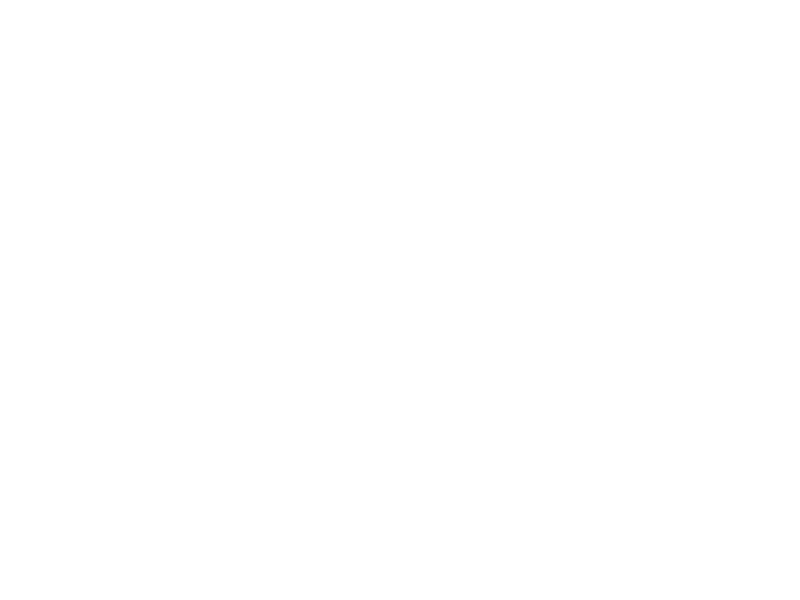

<IPython.core.display.Javascript object>


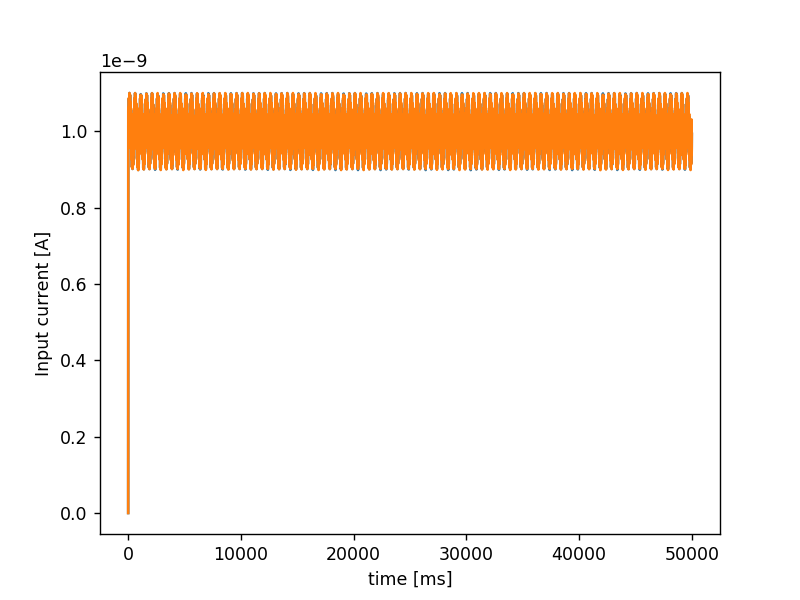

[[1.         1.00125661 1.00251301 ... 0.99623099 0.997487   0.9987434 ]
 [1.         1.01253455 1.0248739  ... 0.96319861 0.97513597 0.98746793]] nA
[[1.         1.00125661 1.00251301 ... 0.99623099 0.997487   0.9987434 ]
 [1.         1.01253455 1.0248739  ... 0.96319861 0.97513597 0.98746793]] nA


In [13]:
%matplotlib notebook
plt.figure()
for i in range(0,nrInputs):
    plt.plot(Input_noSTDP['I'][i])
plt.xlabel('time [ms]')
plt.ylabel('Input current [A]')
#show()
plt.figure()
for i in range(0,nrInputs):
    plt.plot(Input_STDP['I_InputPC'][i])
#plot(InputCurrentPC_AA['PC1AA'][1])
plt.xlabel('time [ms]')
plt.ylabel('Input current [A]')
print(Input_noSTDP['I'])
print(Input_STDP['I'])

In [14]:
#rolling mean of weights?

<IPython.core.display.Javascript object>


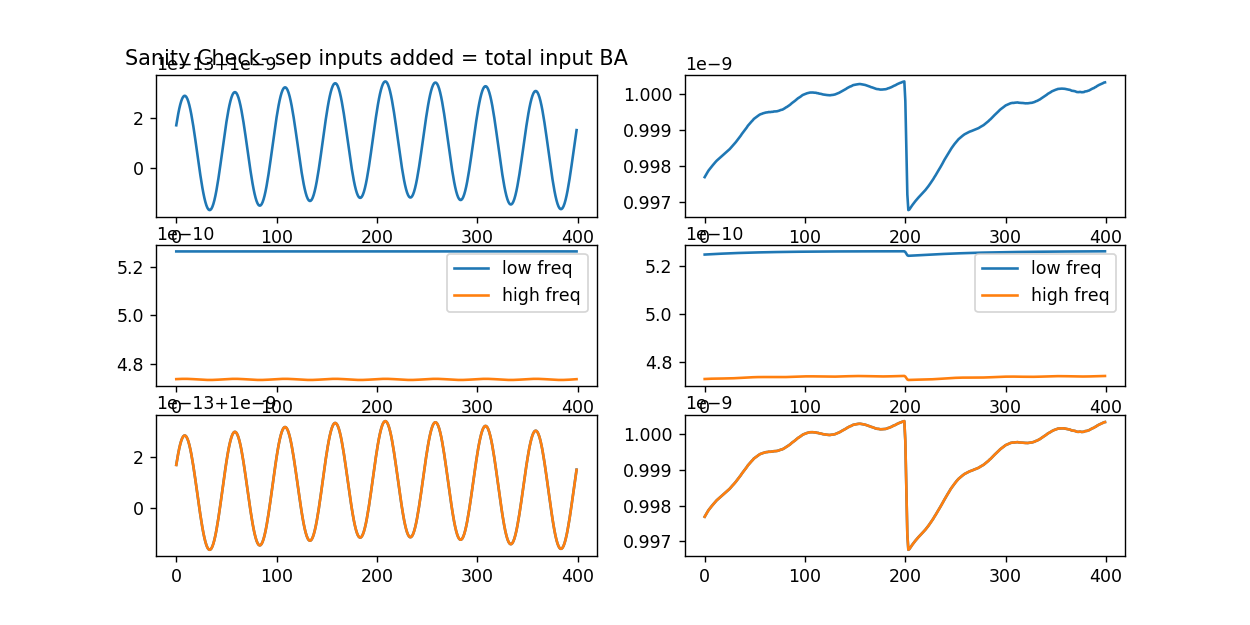

<IPython.core.display.Javascript object>


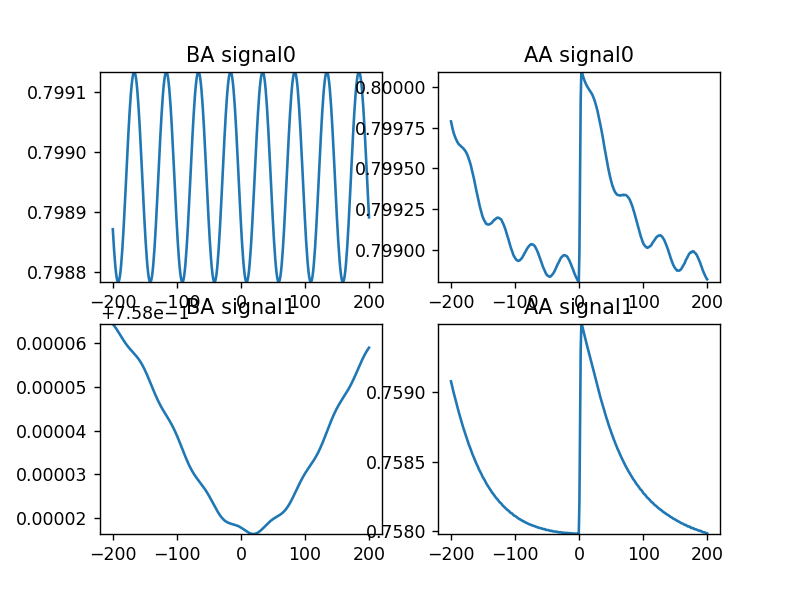

0.7987827300133136 0.799132701292789
0.758016364590749 0.7580643829514345


<IPython.core.display.Javascript object>


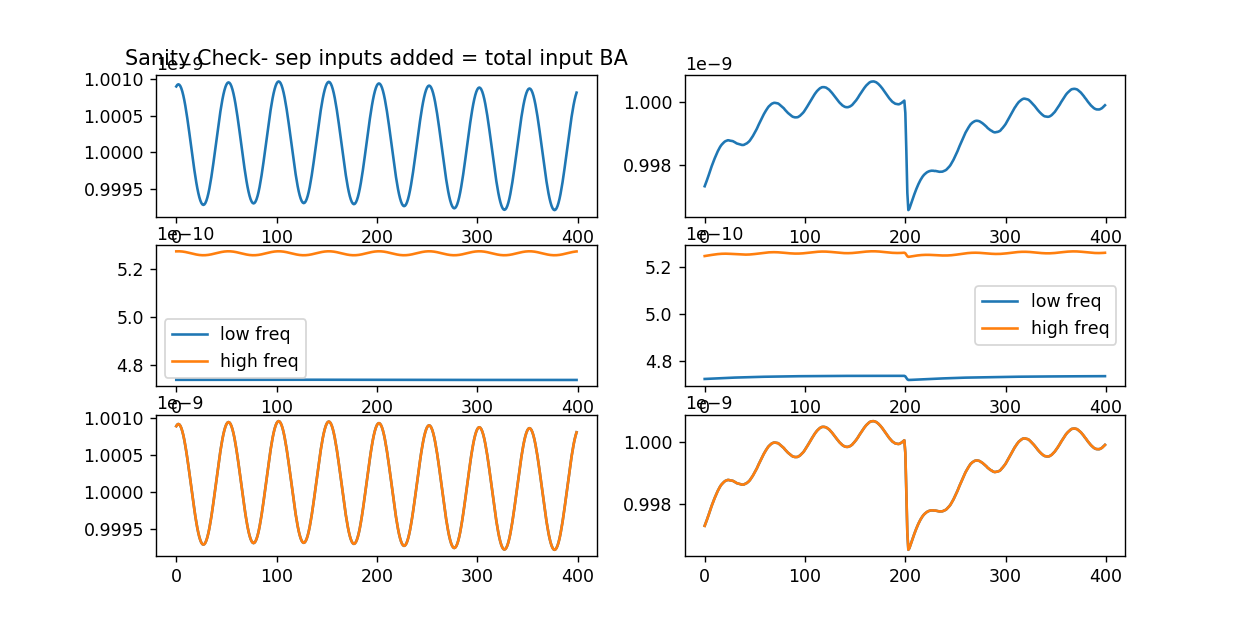

<IPython.core.display.Javascript object>


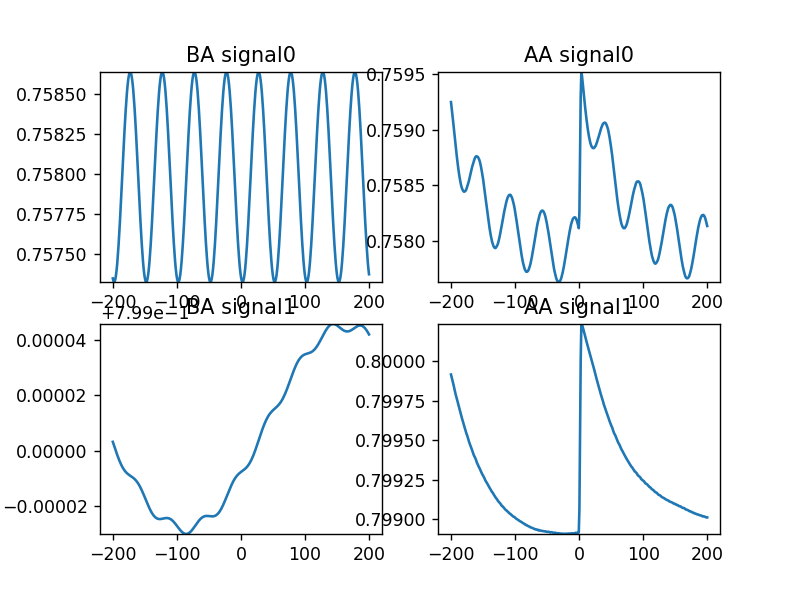

0.7573241347099162 0.7586398572574262
0.7989699964046751 0.7990456163174898


<IPython.core.display.Javascript object>


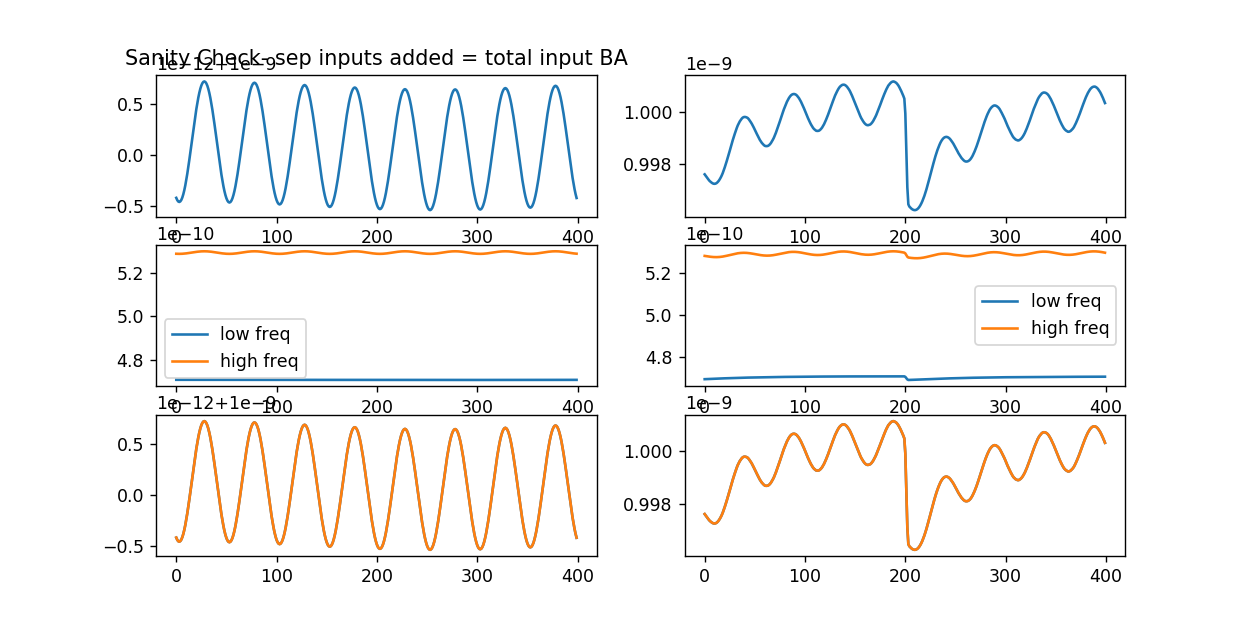

<IPython.core.display.Javascript object>


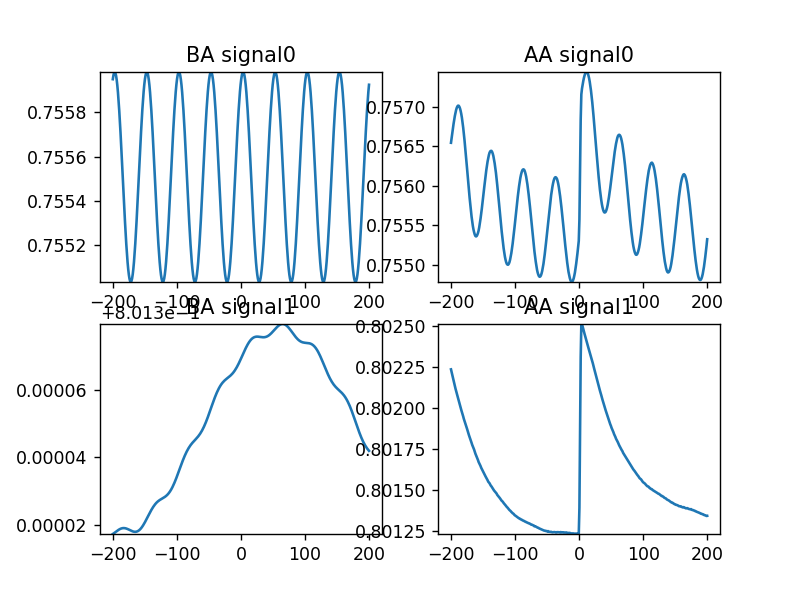

0.7550338611748825 0.7559819552482877
0.8013171951860799 0.8013794430973096


<IPython.core.display.Javascript object>


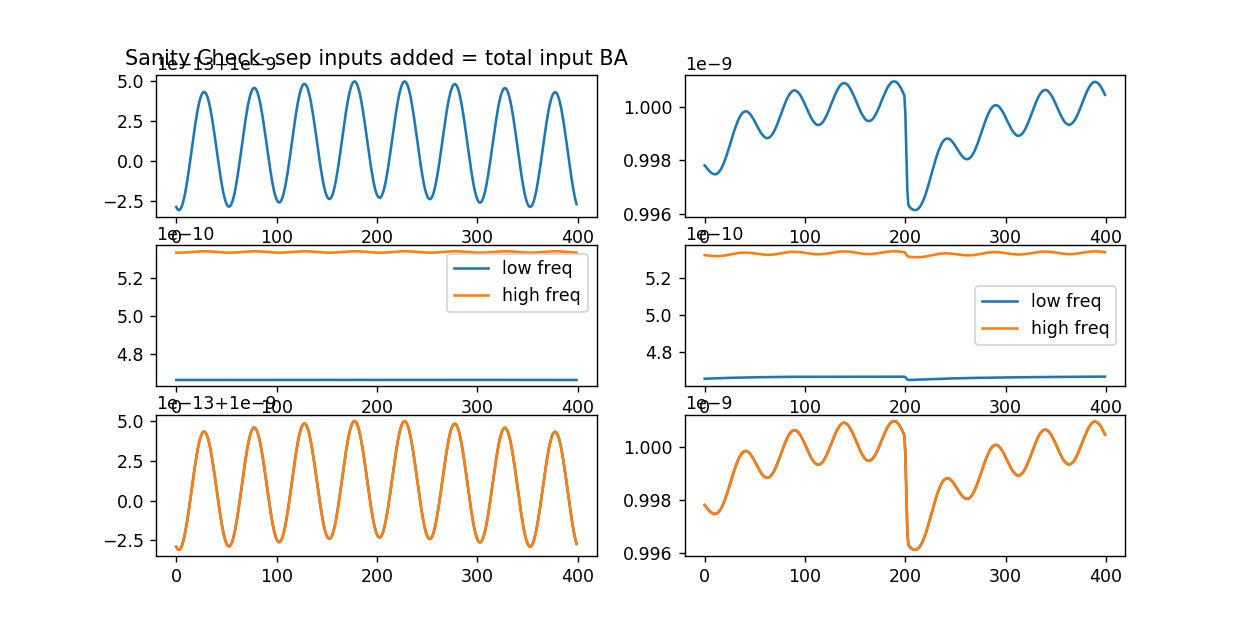

<IPython.core.display.Javascript object>


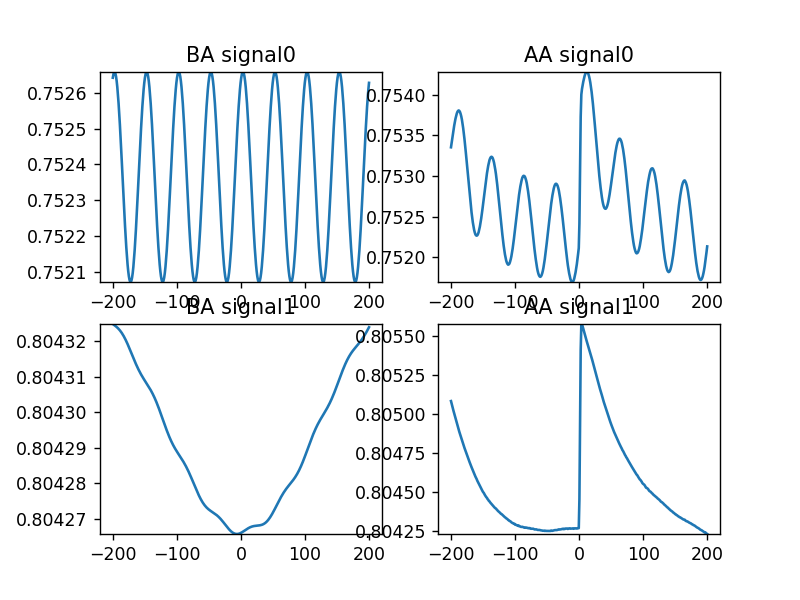

0.7520715474002931 0.7526581972064487
0.8042656887141949 0.8043248037108524


<IPython.core.display.Javascript object>


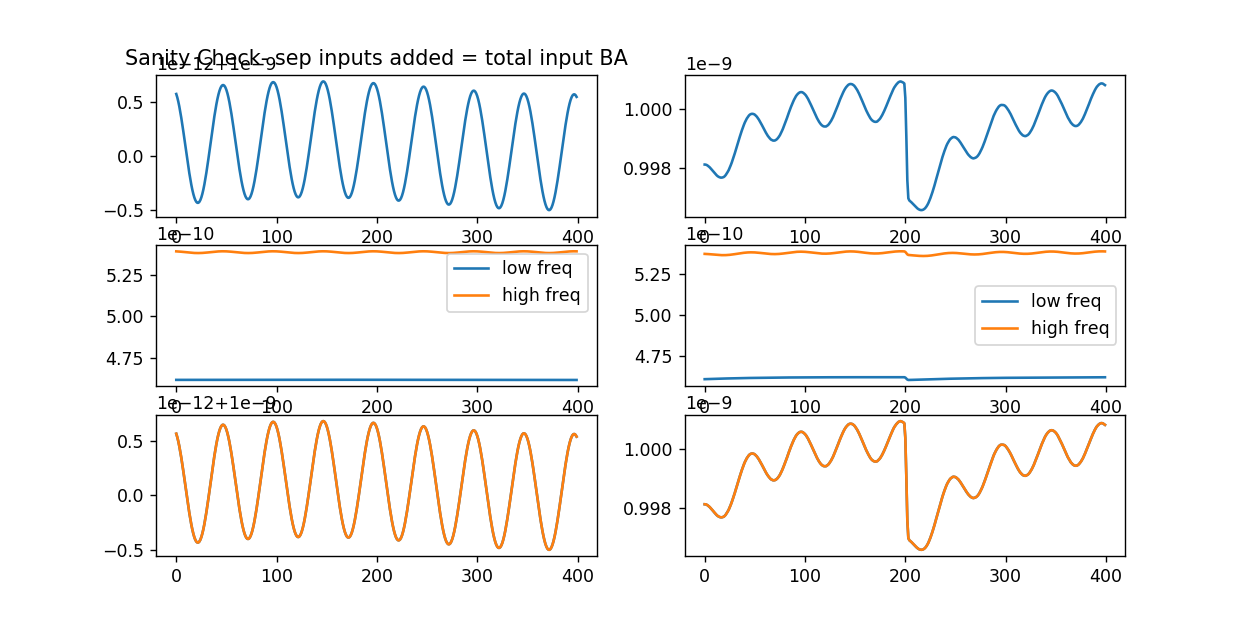

<IPython.core.display.Javascript object>


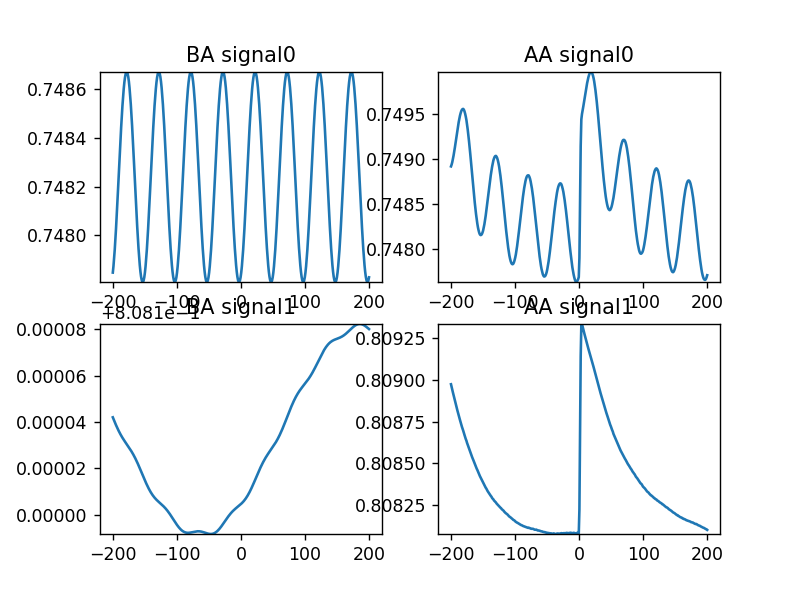

0.7478094249397009 0.7486697581731163
0.8080917278031157 0.8081823734133255


<IPython.core.display.Javascript object>


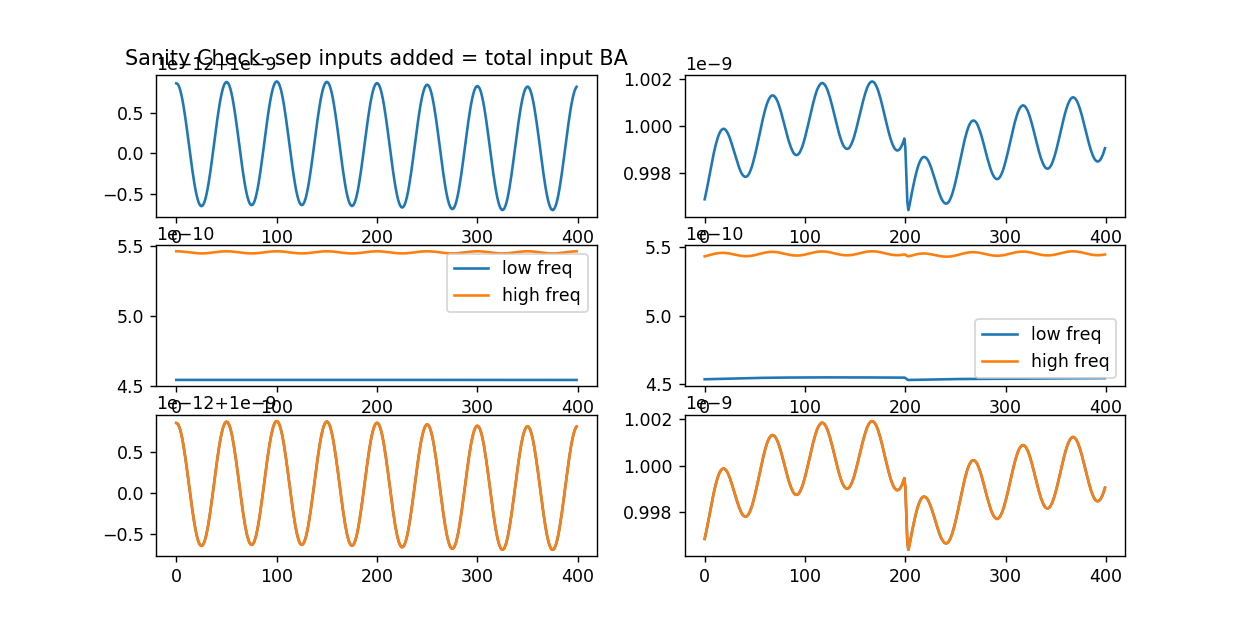

<IPython.core.display.Javascript object>


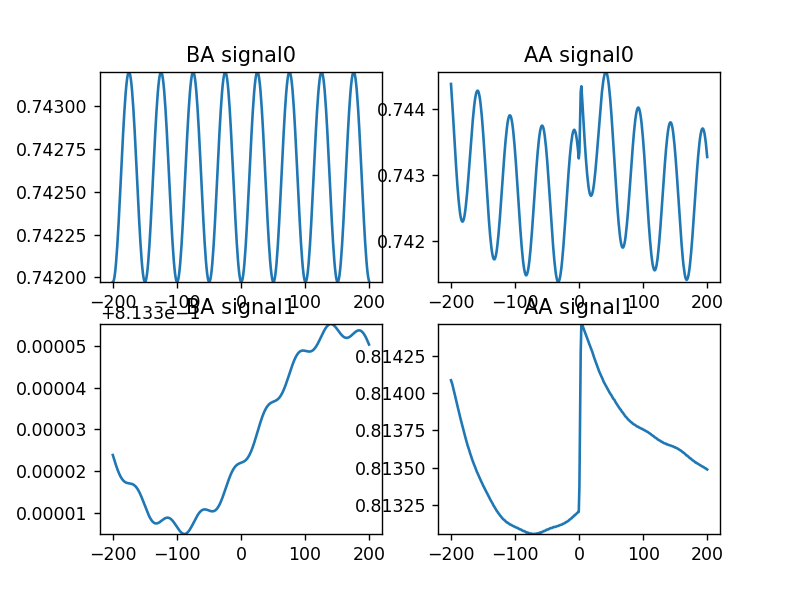

0.7419736069381357 0.7432016894457442
0.8133050678613679 0.8133551419101858


<IPython.core.display.Javascript object>


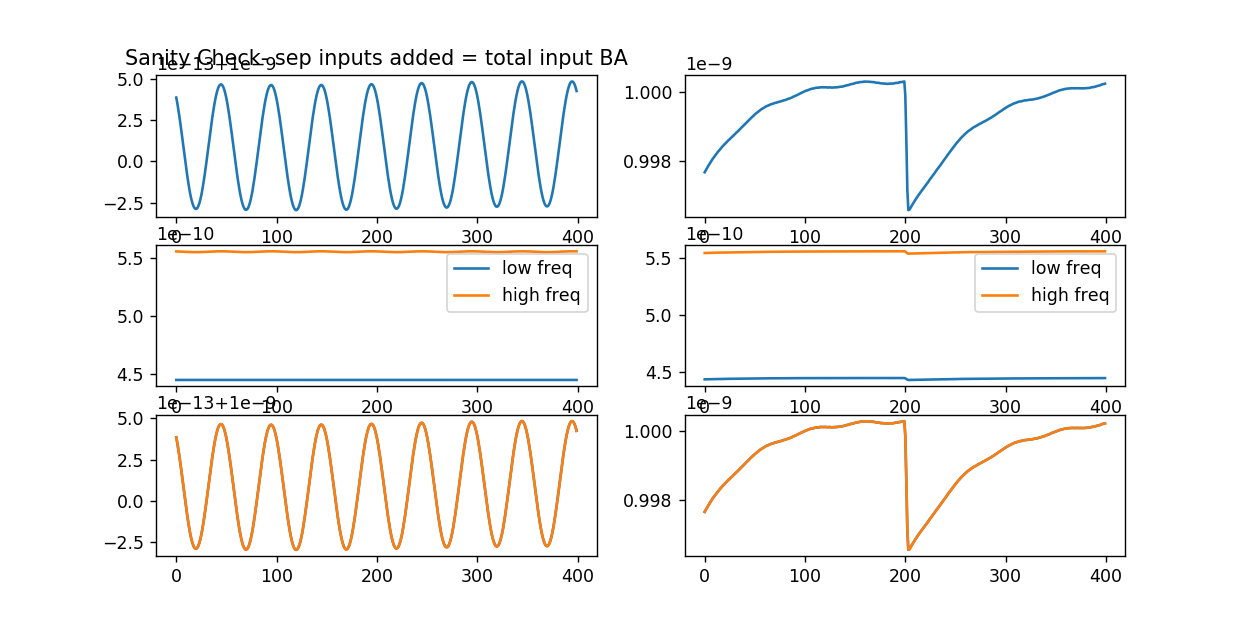

<IPython.core.display.Javascript object>


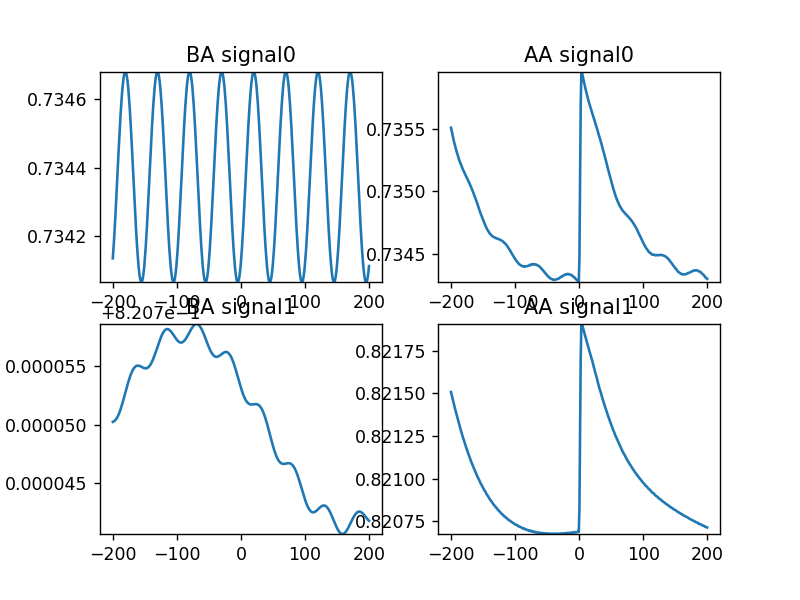

0.7340641829088344 0.7346806497799683
0.8207406400744509 0.8207586390946608


<IPython.core.display.Javascript object>


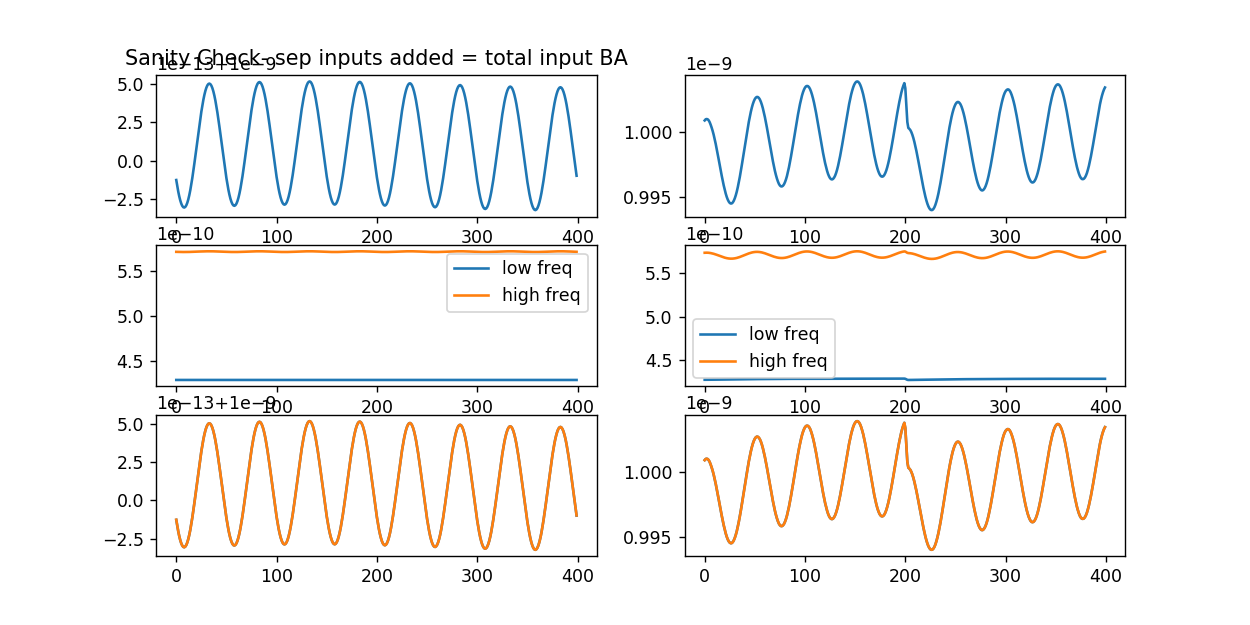

<IPython.core.display.Javascript object>


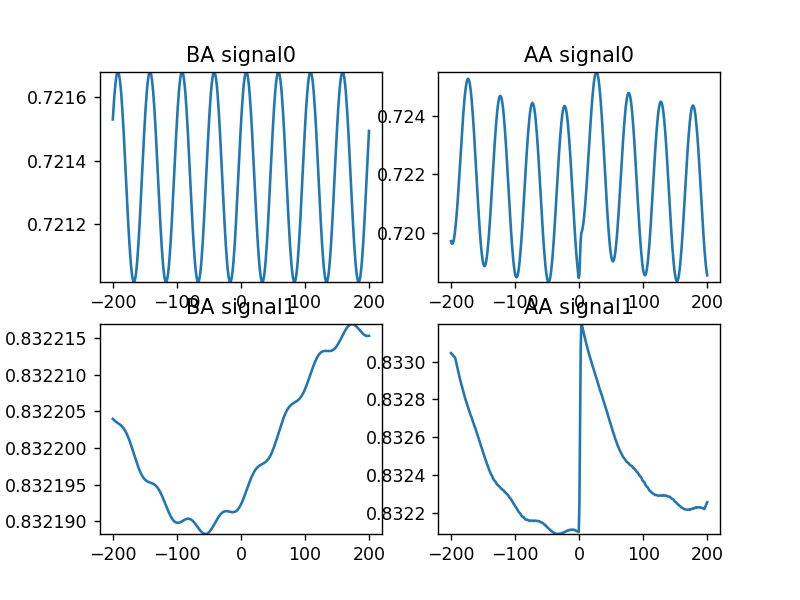

0.7210169401088576 0.721679545196035
0.8321882951868845 0.8322169069793758


<IPython.core.display.Javascript object>


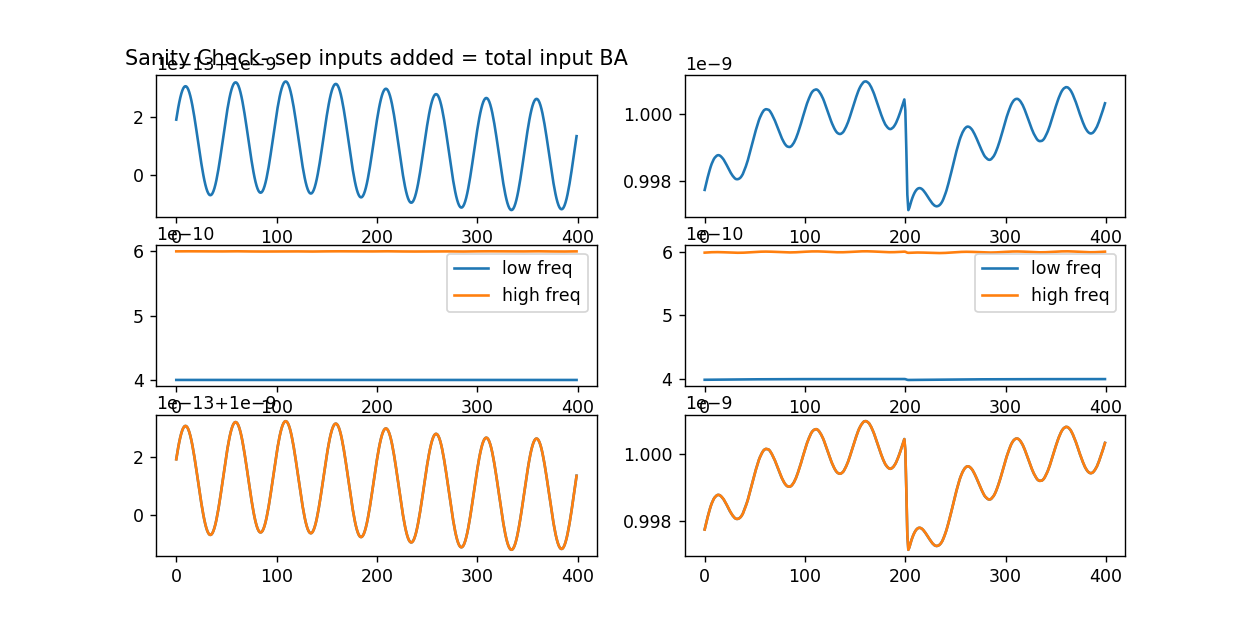

<IPython.core.display.Javascript object>


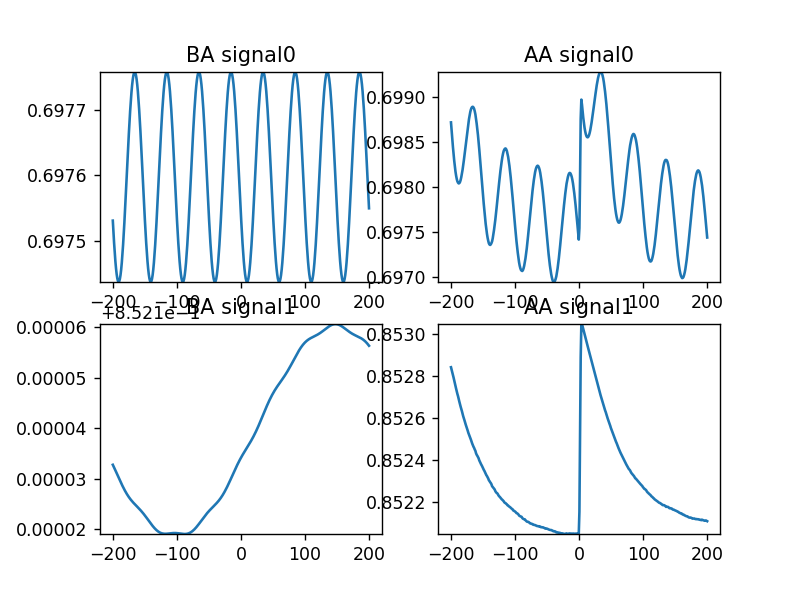

0.6974365482073308 0.6977582731902464
0.85211903201617 0.852160608304705


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 [py.warnings]


<IPython.core.display.Javascript object>


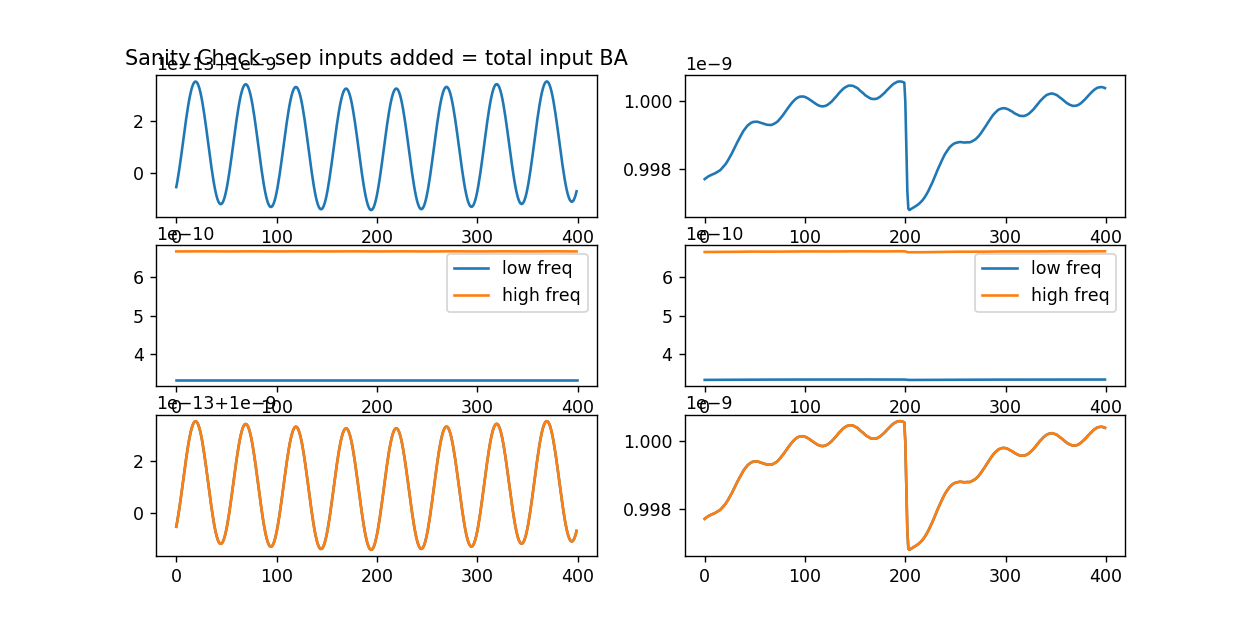

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 [py.warnings]


<IPython.core.display.Javascript object>


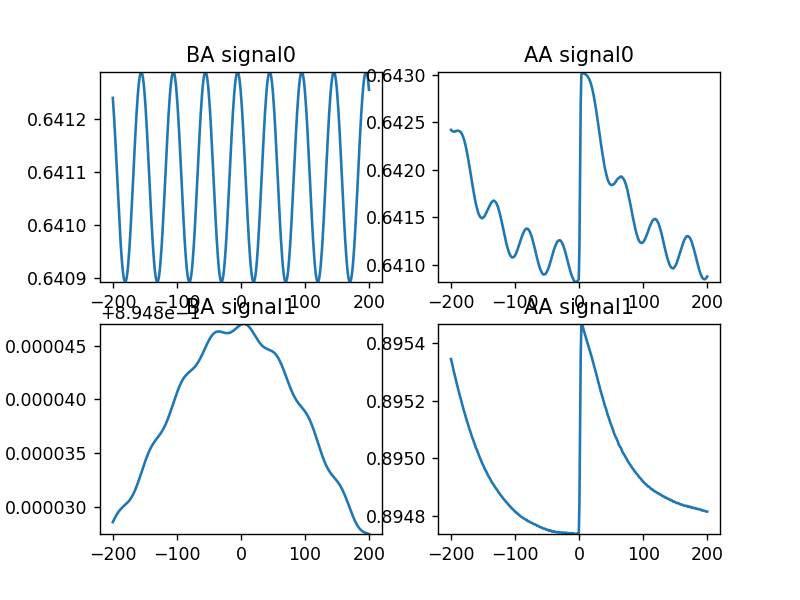

0.6408916651445928 0.6412900508889396
0.8948274349845371 0.8948470535144654


In [18]:
# Correlation between total input and seperate
def corr(x,y):
    #print(asarray(x)-asarray(y))
    return exp(-(((asarray(x)-asarray(y))/1e-9)**2))

# 'yes' to see if the total combined current is equal to the sum of the seperate ones
sanity_check = 'yes'  

for i in range(0,nrPC):
    #print('mean cur ba',meancur_BA[i])
    #print('sep inp ba 1',sep_curBA[0])
    #print('sep inp ba 1',sep_curBA[1])
    
    bacor=[corr(meancur_BA[i],sep_curBA[i*2+k]) for k in range(0,nrInputs)]
    #print('cor1',bacor[1],'cor0',bacor[0])
    #print(meancur_BA[i]*1e9)
    #print(meancur_AA[i]*1e9)
    #print(sep_curBA[0]*1e9)
    #print(sep_curBA[1]*1e9)
    aacor=[corr(meancur_AA[i],sep_curAA[i*2+k]) for k in range(0,nrInputs)]
    #print(x)
    if sanity_check == 'yes':
        fig, axs = subplots(3, 2,figsize=(10,5),sharex=True)

        #title('Sanity check that seperate inputs combine make total input')
        ax1 = subplot(3,2,1)
        ax1.set_title('Sanity Check- sep inputs added = total input BA')
        ax1.plot(meancur_BA[i])
        ax2=subplot(323)
        ax2.plot(sep_curBA[i*2+0],label='low f')
        ax2.plot(sep_curBA[i*2+1],label='high f')
        ax2.legend(['low freq','high freq'])
        #axs=Axes(label=['low freq','high freq'])
        ax3=subplot(325)
        ax3.plot(sep_curBA[i*2+0]+sep_curBA[i*2+1])
        ax3.plot(meancur_BA[i])
        
        #figure(figsize=(10,5))
        #title('Sanity check that seperate inputs combine make total input')
        ax4 = subplot(322)
        ax4.plot(meancur_AA[i])
        ax5=subplot(324)
        ax5.plot(sep_curAA[i*2+0])
        ax5.plot(sep_curAA[i*2+1])
        ax5.legend(['low freq','high freq'])
        #set_labels(['low freq','high freq'])
        ax6=subplot(326)
        ax6.plot(sep_curAA[i*2+0]+sep_curAA[i*2+1])
        ax6.plot(meancur_AA[i])
    
    figa, axsa = subplots(nrInputs,2)
    title('Correlation of the inputs with the total input BA')
    for oo in range(0,nrInputs):
        ax1a = subplot(nrInputs,2,oo*2+1)
        ax1a.set_title('BA signal'+str(oo))
        ax1a.plot(time,bacor[oo])
        xxx=float32(max(bacor[oo]))
        print(min(bacor[oo]),max(bacor[oo]))
        ax1a.set_ylim(min(bacor[oo]),xxx)
            #[min(bacor[oo]),max(bacor[oo])])

        #ylim([min(bacor[oo]),max(bacor[oo])])
        ax2a = subplot(nrInputs,2,oo*2+2)
        ax2a.set_title('AA signal'+str(oo))
        ax2a.plot(time,aacor[oo])
        ax2a.set_ylim(min(aacor[oo]),max(aacor[oo]))
        
            #[min(aacor[oo]),max(aacor[oo])])
        #ylim([min(aacor[oo]),max(aacor[oo])])

    
    #figure()
    #title('Correlation of the inputs with total input AA')
    #for ee in range(0,nrInputs):
    #    subplot(nrInputs,1,ee+1)
    #    plot(time,aacor[ee])
    
show()

In [ ]:
weight =[0.52631579,0.47368421, 0.47058824, 0.46666667, 0.46153846, 0.45454545,
 0.44444444, 0.42857143, 0.4,        0.33333333, 0.47368421, 0.52631579,
 0.52941176, 0.53333333, 0.53846154 ,0.54545455, 0.55555556, 0.57142857,
 0.6 ,       0.66666667]
inp1=weight[0:10]
print(inp1)
inp2=weight[10:]
print(inp2)
inpmean=np.empty((10,1))
print(inpmean)
for k in range(0,len(inp2)):
    inpmean[k] = inp1[k]+inp2[k]
print(inpmean)
print(np.mean(inpmean,axis=1))
print(np.mean(inp1))
print(np.mean(inp2))

In [ ]:
#from elephant import spike_train_correlation as stc
#from elephant.spike_train_correlation import CrossCorrHist
import helpers
reload(helpers)
from helpers.Function_DataAnalysis import *
%matplotlib notebook
import elephant.conversion as conv
import neo as n
import quantities as pq
import elephant.spike_train_correlation as stcorr
import warnings

# Call Correlation Plot function 
# CorrelationPlot(Spikes, nrNeurons, nr of bins, vis)

# spikes : {Dict} - with list of spikes
# nrNeurons : int - number of neurons
# nr of bins : int - number of bins in which the spikes are divided
# vis :  str - 'yes' or 'no' to visualization
# corr1 : np.array - what cells number you want to correlate with the other

# returns - nr x nr matrix delays

sIO_BA = SpikeTimes_BA['IO']
sIO_AA = SpikeTimes_AA['IO']
bins=25001

#corr=np.arange(0,20,1)
#print(corr)
#for k in corr:
#    print(k)
#delayBA = CorrelationPlot(sIO_BA,nrIO, bins,'no')
#delayAA = CorrelationPlot(sIO_AA,nrIO, bins,'no')


In [ ]:
figure()
nf = sns.heatmap(delayBA, cmap='jet',center=0, linewidths=.5)
figure()
pf = sns.heatmap(delayAA, cmap='jet',center=0, linewidths=.5)

In [ ]:
# 5.1 Correlation IO-IO
# see how the different IO cells correlate to eachother
# In the sense of spike times, normalised/unbiased

delayIO_BA = np.empty([nrIO,nrIO])
delayIO_AA = np.empty([nrIO,nrIO])
diffDelay = np.empty([nrIO,nrIO])
norm_corrBA = np.empty([nrIO,nrIO])
norm_corrAA = np.empty([nrIO,nrIO])
%matplotlib notebook

def corr(x,y):
    return exp(-((asarray(x)-asarray(y))**2))
for i in range(0,nrIO):
    # Correlation Before Adapatation
    corBA = max(correlate(VoltCell_BA['IOsoma'][i],VoltCell_BA['IOsoma'][i], 'full'))
    corAA = max(correlate(VoltCell_AA['IOsoma'][i],VoltCell_AA['IOsoma'][i], 'full'))
    #print(corrITSelf)
    #corr_BA=[correlate(VoltCell_BA['IOsoma'][i],VoltCell_BA['IOsoma'][k],'full')/corBA for k in range(0,nrIO)]
    corr_BA = corr(VoltCell_BA['IOsoma'][i],VoltCell_BA['IOsoma'][i+1])
    figure()
    plot(corr_BA)
    figure()
    plot(VoltCell_BA['IOsoma'][i])
    plot(VoltCell_BA['IOsoma'][i+1], color='red')
    show()
    #corr_AA=[correlate(VoltCell_AA['IOsoma'][i],VoltCell_AA['IOsoma'][k],'full')/corAA for k in range(0,nrIO)]
    #corr_BA=[correlate(VoltCell_BA['IOsoma'][i],VoltCell_BA['IOsoma'][k],'full') for k in range(0,nrIO)]
    #corr_AA=[correlate(VoltCell_AA['IOsoma'][i],VoltCell_AA['IOsoma'][k],'full') for k in range(0,nrIO)]
    #print
    leng=len(corr_BA)
    unbiased_corr=np.empty([nrIO,leng])
    #for ii in range(0,leng):
    #unbiased_corrBA = [corr_BA[ii]/(leng-ii) for ii in range(0,leng)]
    #unbiased_corrAA = [corr_BA[ii]/(leng-ii) for ii in range(0,leng)]
    #print(corr_BA)
    #print(len(VoltCell_s.IOsoma_AA[i]))
    #lagIO_BA=numpy.where(corr_BA[i] == numpy.amax(corr_BA[i]))
    
    
    
    lagTotal_BA = [corr_BA[k].argmax()-len(VoltCell_BA['IOsoma'][i])-1 for k in range(0,nrIO)]
    lagTotal_AA = [corr_AA[k].argmax()-len(VoltCell_AA['IOsoma'][i])-1 for k in range(0,nrIO)]
    
    #print(corr_BA)
    norm_corBA = [max(corr_BA[k]) for k in range(0,nrIO)]
    norm_corAA = [max(corr_AA[k]) for k in range(0,nrIO)]

    #print(norm_corr)
    norm_corrBA[i] = norm_corBA
    norm_corrAA[i] = norm_corAA
    
    #print(lagTotal_AA)
    #lagTotal_BA = asarray([(asarray(lagRest_BA[k][0])-asarray(lagIO_BA[0][0])) for k in range(0,nrIO)])
    #lagTotal_BA = lagTotal_BA.reshape(nrIO)
    #print(lagIO_BA)
#print(lagRest_BA)
#print(lagTotal_BA)
    #lagIO_AA=numpy.where(corr_AA[i] == numpy.amax(corr_AA[i]))
    #lagRest_AA = [numpy.where(corr_AA[k] == numpy.amax(corr_AA[k])) for k in range(0,nrIO)]
    #lagTotal_AA = asarray([(asarray(lagRest_AA[k][0])-asarray(lagIO_AA[0][0])) for k in range(0,nrIO)])
    #lagTotal_AA = lagTotal_AA.reshape(nrIO)

    delayIO_BA[i] = lagTotal_BA
    delayIO_AA[i] = lagTotal_AA
    
    if i==0:
        plt.subplot(121)
        #tranBA=transpose(corr_BA)
        #print(tranBA.shape)
        for kk in range(0,nrIO):
            colorVal = scalarMap.to_rgba(values[kk])    
        #for l in range(0,nrIO):
            plot(corr_BA[kk], color=colorVal)
            #plot(unbiased_corrBA[kk], color=colorVal)

        plt.title('Correlation IO cell 1 with the others')
        plt.xlabel('data points')
        plt.ylabel('level of correlation')
        ax1=plt.subplot(122)
        for kk in range(0,nrIO):
            colorVal = scalarMap.to_rgba(values[kk])    
        #for l in range(0,nrIO):
            plot(corr_BA[kk], color=colorVal)
            #plot(unbiased_corrBA[kk], color=colorVal)

        ax1.set_xlim([corr_BA[i].argmax()-100, corr_BA[i].argmax()+100])
        bmax=max(asarray(corr_BA[i]))
        ax1.set_ylim([bmax-0.1,bmax])
        show()
        subplot(121)
        #tranAA=transpose(corr_AA)
        #plot(tranAA)
        #print(len(corr_A[0]))
        #print(len(corr_BA))
        for kk in range(0,nrIO):
            colorVal = scalarMap.to_rgba(values[kk])    
            #for l in range(0,nrIO):
            plot(corr_AA[kk], color=colorVal)

            #plot(unbiased_corrAA[kk], color=colorVal)

            #plot(corr_AA[kk], color=colorVal)
        plt.title('Correlation IO cell 1 with the others')
        plt.xlabel('data points')
        plt.ylabel('level of correlation')
        ax1=plt.subplot(122)
        #plot(tranAA)
        for kk in range(0,nrIO):
            colorVal = scalarMap.to_rgba(values[kk])    
        #for l in range(0,nrIO):
            plot(corr_AA[kk], color=colorVal)
            #plot(unbiased_corrAA[kk], color=colorVal)

        ax1.set_xlim([corr_AA[i].argmax()-100, corr_AA[i].argmax()+100])
        amax=max(asarray(corr_AA[i]))
        ax1.set_ylim([amax-0.1,amax])       
            
            
    #print(lagTotal_AA[:])

    diffDelay[i] = abs(asarray(lagTotal_AA)-asarray(lagTotal_BA))


figure()
ax = sns.heatmap(delayIO_BA, center=0,cmap='jet',linewidths=.5)

figure()
sx = sns.heatmap(delayIO_AA, center=0, cmap='jet', linewidths=.5)

figure()
df = sns.heatmap(diffDelay,center=0, cmap='jet', linewidths=.5)

figure()
nf = sns.heatmap(norm_corrBA, cmap='jet', linewidths=.5)

figure()
nf2 = sns.heatmap(norm_corrAA, cmap='jet', linewidths=.5)

#figure()
#nf3 =  sns.heatmap(abs(norm_corrBA-norm_corrAA), cmap='jet', linewidths=.5)
